In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils, to_categorical
import csv

In [65]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [66]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [67]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [69]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [ ]:
#model without half time statistics

In [70]:
X = fixtures[[0,1,4,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest = X.ix[600:,]
Ytest = Y.ix[600:,]
Xtrain

/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


array([[ 0.32991807, -1.00166528,  0.53309289, -0.04039387, -0.37653795],
       [ 0.32991807, -1.00166528,  0.53309289,  0.49329439, -0.79507277],
       [ 0.32991807, -1.00166528, -1.87584567, -0.11663505, -0.40389317],
       ...,
       [-0.93140991,  0.99833749,  0.53309289,  0.72201792,  1.51097198],
       [-0.93140991,  0.99833749,  0.53309289,  1.48442972,  2.33162847],
       [-0.93140991, -1.00166528,  0.53309289, -0.19287623, -0.13034101]])

In [76]:
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(105, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [77]:
history = model.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/1000
 - 1s - loss: 2.0422 - acc: 0.0476 - val_loss: 2.0306 - val_acc: 0.0552
Epoch 2/1000
 - 0s - loss: 2.0370 - acc: 0.0524 - val_loss: 2.0258 - val_acc: 0.0552
Epoch 3/1000
 - 0s - loss: 2.0320 - acc: 0.0548 - val_loss: 2.0212 - val_acc: 0.0608
Epoch 4/1000
 - 0s - loss: 2.0270 - acc: 0.0571 - val_loss: 2.0166 - val_acc: 0.0718
Epoch 5/1000
 - 0s - loss: 2.0222 - acc: 0.0571 - val_loss: 2.0122 - val_acc: 0.0829
Epoch 6/1000
 - 0s - loss: 2.0174 - acc: 0.0595 - val_loss: 2.0078 - val_acc: 0.0994
Epoch 7/1000
 - 0s - loss: 2.0127 - acc: 0.0619 - val_loss: 2.0034 - val_acc: 0.1160
Epoch 8/1000
 - 0s - loss: 2.0081 - acc: 0.0738 - val_loss: 1.9992 - val_acc: 0.1492
Epoch 9/1000
 - 0s - loss: 2.0036 - acc: 0.0929 - val_loss: 1.9950 - val_acc: 0.1768
Epoch 10/1000
 - 0s - loss: 1.9992 - acc: 0.1167 - val_loss: 1.9910 - val_acc: 0.1823
Epoch 11/1000
 - 0s - loss: 1.9949 - acc: 0.1286 - val_loss: 1.9869 - val_acc: 0.1878
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 1.7703 - acc: 0.3000 - val_loss: 1.7684 - val_acc: 0.2983
Epoch 97/1000
 - 0s - loss: 1.7685 - acc: 0.3024 - val_loss: 1.7666 - val_acc: 0.2983
Epoch 98/1000
 - 0s - loss: 1.7667 - acc: 0.3024 - val_loss: 1.7647 - val_acc: 0.2983
Epoch 99/1000
 - 0s - loss: 1.7650 - acc: 0.3071 - val_loss: 1.7629 - val_acc: 0.2983
Epoch 100/1000
 - 0s - loss: 1.7633 - acc: 0.3071 - val_loss: 1.7611 - val_acc: 0.2983
Epoch 101/1000
 - 0s - loss: 1.7616 - acc: 0.3071 - val_loss: 1.7593 - val_acc: 0.2983
Epoch 102/1000
 - 0s - loss: 1.7599 - acc: 0.3071 - val_loss: 1.7576 - val_acc: 0.2983
Epoch 103/1000
 - 0s - loss: 1.7582 - acc: 0.3071 - val_loss: 1.7558 - val_acc: 0.2983
Epoch 104/1000
 - 0s - loss: 1.7565 - acc: 0.3119 - val_loss: 1.7540 - val_acc: 0.2983
Epoch 105/1000
 - 0s - loss: 1.7548 - acc: 0.3095 - val_loss: 1.7523 - val_acc: 0.2983
Epoch 106/1000
 - 0s - loss: 1.7532 - acc: 0.3071 - val_loss: 1.7505 - val_acc: 0.3039
Epoch 107/1000
 - 0s - loss: 1.7515 - acc: 0.31

Epoch 191/1000
 - 0s - loss: 1.6480 - acc: 0.3405 - val_loss: 1.6352 - val_acc: 0.3204
Epoch 192/1000
 - 0s - loss: 1.6471 - acc: 0.3381 - val_loss: 1.6342 - val_acc: 0.3204
Epoch 193/1000
 - 0s - loss: 1.6463 - acc: 0.3381 - val_loss: 1.6332 - val_acc: 0.3204
Epoch 194/1000
 - 0s - loss: 1.6454 - acc: 0.3381 - val_loss: 1.6322 - val_acc: 0.3204
Epoch 195/1000
 - 0s - loss: 1.6445 - acc: 0.3381 - val_loss: 1.6312 - val_acc: 0.3204
Epoch 196/1000
 - 0s - loss: 1.6437 - acc: 0.3381 - val_loss: 1.6302 - val_acc: 0.3204
Epoch 197/1000
 - 0s - loss: 1.6428 - acc: 0.3405 - val_loss: 1.6292 - val_acc: 0.3204
Epoch 198/1000
 - 0s - loss: 1.6420 - acc: 0.3381 - val_loss: 1.6283 - val_acc: 0.3204
Epoch 199/1000
 - 0s - loss: 1.6411 - acc: 0.3381 - val_loss: 1.6273 - val_acc: 0.3204
Epoch 200/1000
 - 0s - loss: 1.6403 - acc: 0.3381 - val_loss: 1.6263 - val_acc: 0.3204
Epoch 201/1000
 - 0s - loss: 1.6395 - acc: 0.3381 - val_loss: 1.6254 - val_acc: 0.3260
Epoch 202/1000
 - 0s - loss: 1.6387 - acc: 

 - 0s - loss: 1.5884 - acc: 0.3500 - val_loss: 1.5662 - val_acc: 0.3315
Epoch 286/1000
 - 0s - loss: 1.5879 - acc: 0.3500 - val_loss: 1.5657 - val_acc: 0.3315
Epoch 287/1000
 - 0s - loss: 1.5875 - acc: 0.3500 - val_loss: 1.5652 - val_acc: 0.3315
Epoch 288/1000
 - 0s - loss: 1.5871 - acc: 0.3500 - val_loss: 1.5647 - val_acc: 0.3315
Epoch 289/1000
 - 0s - loss: 1.5866 - acc: 0.3500 - val_loss: 1.5642 - val_acc: 0.3315
Epoch 290/1000
 - 0s - loss: 1.5862 - acc: 0.3500 - val_loss: 1.5637 - val_acc: 0.3315
Epoch 291/1000
 - 0s - loss: 1.5858 - acc: 0.3500 - val_loss: 1.5632 - val_acc: 0.3315
Epoch 292/1000
 - 0s - loss: 1.5854 - acc: 0.3500 - val_loss: 1.5628 - val_acc: 0.3315
Epoch 293/1000
 - 0s - loss: 1.5849 - acc: 0.3500 - val_loss: 1.5623 - val_acc: 0.3315
Epoch 294/1000
 - 0s - loss: 1.5845 - acc: 0.3500 - val_loss: 1.5618 - val_acc: 0.3315
Epoch 295/1000
 - 0s - loss: 1.5841 - acc: 0.3500 - val_loss: 1.5613 - val_acc: 0.3315
Epoch 296/1000
 - 0s - loss: 1.5837 - acc: 0.3476 - val_lo

Epoch 380/1000
 - 0s - loss: 1.5563 - acc: 0.3595 - val_loss: 1.5313 - val_acc: 0.3315
Epoch 381/1000
 - 0s - loss: 1.5561 - acc: 0.3595 - val_loss: 1.5311 - val_acc: 0.3315
Epoch 382/1000
 - 0s - loss: 1.5558 - acc: 0.3595 - val_loss: 1.5308 - val_acc: 0.3315
Epoch 383/1000
 - 0s - loss: 1.5556 - acc: 0.3595 - val_loss: 1.5306 - val_acc: 0.3315
Epoch 384/1000
 - 0s - loss: 1.5553 - acc: 0.3595 - val_loss: 1.5303 - val_acc: 0.3315
Epoch 385/1000
 - 0s - loss: 1.5551 - acc: 0.3595 - val_loss: 1.5300 - val_acc: 0.3315
Epoch 386/1000
 - 0s - loss: 1.5548 - acc: 0.3595 - val_loss: 1.5298 - val_acc: 0.3315
Epoch 387/1000
 - 0s - loss: 1.5546 - acc: 0.3595 - val_loss: 1.5295 - val_acc: 0.3315
Epoch 388/1000
 - 0s - loss: 1.5543 - acc: 0.3595 - val_loss: 1.5293 - val_acc: 0.3315
Epoch 389/1000
 - 0s - loss: 1.5541 - acc: 0.3595 - val_loss: 1.5290 - val_acc: 0.3315
Epoch 390/1000
 - 0s - loss: 1.5538 - acc: 0.3595 - val_loss: 1.5288 - val_acc: 0.3315
Epoch 391/1000
 - 0s - loss: 1.5536 - acc: 

 - 0s - loss: 1.5365 - acc: 0.3619 - val_loss: 1.5125 - val_acc: 0.3260
Epoch 475/1000
 - 0s - loss: 1.5363 - acc: 0.3619 - val_loss: 1.5123 - val_acc: 0.3260
Epoch 476/1000
 - 0s - loss: 1.5362 - acc: 0.3619 - val_loss: 1.5122 - val_acc: 0.3260
Epoch 477/1000
 - 0s - loss: 1.5360 - acc: 0.3619 - val_loss: 1.5120 - val_acc: 0.3260
Epoch 478/1000
 - 0s - loss: 1.5358 - acc: 0.3619 - val_loss: 1.5118 - val_acc: 0.3260
Epoch 479/1000
 - 0s - loss: 1.5357 - acc: 0.3619 - val_loss: 1.5117 - val_acc: 0.3260
Epoch 480/1000
 - 0s - loss: 1.5355 - acc: 0.3619 - val_loss: 1.5115 - val_acc: 0.3260
Epoch 481/1000
 - 0s - loss: 1.5353 - acc: 0.3619 - val_loss: 1.5114 - val_acc: 0.3260
Epoch 482/1000
 - 0s - loss: 1.5352 - acc: 0.3619 - val_loss: 1.5113 - val_acc: 0.3260
Epoch 483/1000
 - 0s - loss: 1.5350 - acc: 0.3619 - val_loss: 1.5111 - val_acc: 0.3204
Epoch 484/1000
 - 0s - loss: 1.5348 - acc: 0.3619 - val_loss: 1.5110 - val_acc: 0.3204
Epoch 485/1000
 - 0s - loss: 1.5347 - acc: 0.3619 - val_lo

Epoch 569/1000
 - 0s - loss: 1.5225 - acc: 0.3643 - val_loss: 1.5009 - val_acc: 0.3315
Epoch 570/1000
 - 0s - loss: 1.5224 - acc: 0.3643 - val_loss: 1.5008 - val_acc: 0.3370
Epoch 571/1000
 - 0s - loss: 1.5223 - acc: 0.3643 - val_loss: 1.5007 - val_acc: 0.3370
Epoch 572/1000
 - 0s - loss: 1.5222 - acc: 0.3643 - val_loss: 1.5006 - val_acc: 0.3370
Epoch 573/1000
 - 0s - loss: 1.5221 - acc: 0.3643 - val_loss: 1.5005 - val_acc: 0.3370
Epoch 574/1000
 - 0s - loss: 1.5219 - acc: 0.3643 - val_loss: 1.5004 - val_acc: 0.3370
Epoch 575/1000
 - 0s - loss: 1.5218 - acc: 0.3643 - val_loss: 1.5003 - val_acc: 0.3370
Epoch 576/1000
 - 0s - loss: 1.5217 - acc: 0.3619 - val_loss: 1.5002 - val_acc: 0.3370
Epoch 577/1000
 - 0s - loss: 1.5216 - acc: 0.3643 - val_loss: 1.5001 - val_acc: 0.3370
Epoch 578/1000
 - 0s - loss: 1.5214 - acc: 0.3643 - val_loss: 1.5000 - val_acc: 0.3370
Epoch 579/1000
 - 0s - loss: 1.5213 - acc: 0.3643 - val_loss: 1.4999 - val_acc: 0.3315
Epoch 580/1000
 - 0s - loss: 1.5212 - acc: 

 - 0s - loss: 1.5123 - acc: 0.3929 - val_loss: 1.4932 - val_acc: 0.3204
Epoch 664/1000
 - 0s - loss: 1.5122 - acc: 0.3929 - val_loss: 1.4931 - val_acc: 0.3204
Epoch 665/1000
 - 0s - loss: 1.5121 - acc: 0.3929 - val_loss: 1.4930 - val_acc: 0.3204
Epoch 666/1000
 - 0s - loss: 1.5120 - acc: 0.3929 - val_loss: 1.4929 - val_acc: 0.3204
Epoch 667/1000
 - 0s - loss: 1.5119 - acc: 0.3929 - val_loss: 1.4929 - val_acc: 0.3260
Epoch 668/1000
 - 0s - loss: 1.5118 - acc: 0.3929 - val_loss: 1.4928 - val_acc: 0.3260
Epoch 669/1000
 - 0s - loss: 1.5117 - acc: 0.3881 - val_loss: 1.4927 - val_acc: 0.3260
Epoch 670/1000
 - 0s - loss: 1.5116 - acc: 0.3881 - val_loss: 1.4927 - val_acc: 0.3260
Epoch 671/1000
 - 0s - loss: 1.5115 - acc: 0.3881 - val_loss: 1.4926 - val_acc: 0.3260
Epoch 672/1000
 - 0s - loss: 1.5114 - acc: 0.3881 - val_loss: 1.4925 - val_acc: 0.3260
Epoch 673/1000
 - 0s - loss: 1.5113 - acc: 0.3881 - val_loss: 1.4925 - val_acc: 0.3260
Epoch 674/1000
 - 0s - loss: 1.5112 - acc: 0.3881 - val_lo

Epoch 758/1000
 - 0s - loss: 1.5040 - acc: 0.3929 - val_loss: 1.4878 - val_acc: 0.3370
Epoch 759/1000
 - 0s - loss: 1.5040 - acc: 0.3929 - val_loss: 1.4877 - val_acc: 0.3370
Epoch 760/1000
 - 0s - loss: 1.5039 - acc: 0.3929 - val_loss: 1.4877 - val_acc: 0.3370
Epoch 761/1000
 - 0s - loss: 1.5038 - acc: 0.3929 - val_loss: 1.4876 - val_acc: 0.3370
Epoch 762/1000
 - 0s - loss: 1.5037 - acc: 0.3929 - val_loss: 1.4876 - val_acc: 0.3370
Epoch 763/1000
 - 0s - loss: 1.5037 - acc: 0.3929 - val_loss: 1.4875 - val_acc: 0.3370
Epoch 764/1000
 - 0s - loss: 1.5036 - acc: 0.3929 - val_loss: 1.4875 - val_acc: 0.3370
Epoch 765/1000
 - 0s - loss: 1.5035 - acc: 0.3952 - val_loss: 1.4874 - val_acc: 0.3370
Epoch 766/1000
 - 0s - loss: 1.5034 - acc: 0.3952 - val_loss: 1.4874 - val_acc: 0.3370
Epoch 767/1000
 - 0s - loss: 1.5033 - acc: 0.3929 - val_loss: 1.4873 - val_acc: 0.3370
Epoch 768/1000
 - 0s - loss: 1.5033 - acc: 0.3929 - val_loss: 1.4873 - val_acc: 0.3370
Epoch 769/1000
 - 0s - loss: 1.5032 - acc: 

 - 0s - loss: 1.4974 - acc: 0.3976 - val_loss: 1.4840 - val_acc: 0.3536
Epoch 853/1000
 - 0s - loss: 1.4973 - acc: 0.4000 - val_loss: 1.4839 - val_acc: 0.3536
Epoch 854/1000
 - 0s - loss: 1.4973 - acc: 0.4000 - val_loss: 1.4839 - val_acc: 0.3536
Epoch 855/1000
 - 0s - loss: 1.4972 - acc: 0.4000 - val_loss: 1.4839 - val_acc: 0.3536
Epoch 856/1000
 - 0s - loss: 1.4971 - acc: 0.4000 - val_loss: 1.4838 - val_acc: 0.3536
Epoch 857/1000
 - 0s - loss: 1.4971 - acc: 0.4000 - val_loss: 1.4838 - val_acc: 0.3536
Epoch 858/1000
 - 0s - loss: 1.4970 - acc: 0.4000 - val_loss: 1.4838 - val_acc: 0.3536
Epoch 859/1000
 - 0s - loss: 1.4969 - acc: 0.4000 - val_loss: 1.4837 - val_acc: 0.3536
Epoch 860/1000
 - 0s - loss: 1.4969 - acc: 0.4000 - val_loss: 1.4837 - val_acc: 0.3536
Epoch 861/1000
 - 0s - loss: 1.4968 - acc: 0.4000 - val_loss: 1.4837 - val_acc: 0.3536
Epoch 862/1000
 - 0s - loss: 1.4967 - acc: 0.4000 - val_loss: 1.4836 - val_acc: 0.3536
Epoch 863/1000
 - 0s - loss: 1.4967 - acc: 0.4000 - val_lo

Epoch 947/1000
 - 0s - loss: 1.4916 - acc: 0.3857 - val_loss: 1.4811 - val_acc: 0.3481
Epoch 948/1000
 - 0s - loss: 1.4915 - acc: 0.3857 - val_loss: 1.4811 - val_acc: 0.3481
Epoch 949/1000
 - 0s - loss: 1.4915 - acc: 0.3857 - val_loss: 1.4811 - val_acc: 0.3481
Epoch 950/1000
 - 0s - loss: 1.4914 - acc: 0.3857 - val_loss: 1.4810 - val_acc: 0.3481
Epoch 951/1000
 - 0s - loss: 1.4914 - acc: 0.3857 - val_loss: 1.4810 - val_acc: 0.3481
Epoch 952/1000
 - 0s - loss: 1.4913 - acc: 0.3857 - val_loss: 1.4810 - val_acc: 0.3481
Epoch 953/1000
 - 0s - loss: 1.4913 - acc: 0.3857 - val_loss: 1.4810 - val_acc: 0.3481
Epoch 954/1000
 - 0s - loss: 1.4912 - acc: 0.3857 - val_loss: 1.4809 - val_acc: 0.3481
Epoch 955/1000
 - 0s - loss: 1.4911 - acc: 0.3833 - val_loss: 1.4809 - val_acc: 0.3481
Epoch 956/1000
 - 0s - loss: 1.4911 - acc: 0.3833 - val_loss: 1.4809 - val_acc: 0.3481
Epoch 957/1000
 - 0s - loss: 1.4910 - acc: 0.3833 - val_loss: 1.4808 - val_acc: 0.3481
Epoch 958/1000
 - 0s - loss: 1.4910 - acc: 

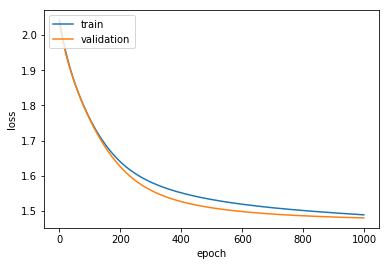

In [78]:
#without half time details loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

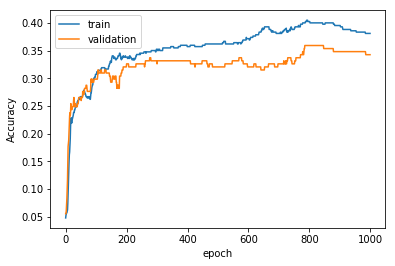

In [79]:
#without halftime details accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:






# model with half time statistics
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest = X.ix[600:,]
Ytest = Y.ix[600:,]


/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


array([[ 0.32991807, -1.00166528,  0.32422988, ..., -0.21617906,
        -0.04039387, -0.37653795],
       [ 0.32991807, -1.00166528,  1.49809831, ...,  2.11368795,
         0.49329439, -0.79507277],
       [ 0.32991807, -1.00166528, -0.84963855, ..., -0.22754426,
        -0.11663505, -0.40389317],
       ...,
       [-0.93140991,  0.99833749,  1.49809831, ..., -0.80716971,
         0.72201792,  1.51097198],
       [-0.93140991,  0.99833749,  0.32422988, ..., -0.86967834,
         1.48442972,  2.33162847],
       [-0.93140991, -1.00166528,  0.32422988, ..., -0.44348315,
        -0.19287623, -0.13034101]])

In [105]:
# def regression_model():
# 	model = Sequential()
# 	model.add(Dense(15, input_shape=(8,), kernel_initializer='normal', activation='relu'))
# 	#model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(7, kernel_initializer='normal'))
# 	model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
# 	return model

In [106]:
# estimator = KerasClassifier(build_fn=regression_model, nb_epoch=100, batch_size=300)#, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, Xtrain, Ytrain, cv=kfold)
# results
# print("Results: %.2f MSE" % (results.mean()))


In [107]:
# #second model
# model = Sequential()
# model.add(Dense(500, input_shape=(8,), kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
# model.add(Dense(100, kernel_initializer='normal', activation='tanh'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
# # train model
# history = model.fit(X_scaled, Y_scaled, epochs=100, batch_size=30, verbose=2, validation_split = 0.3)


In [81]:
model = Sequential()
model.add(Dense(25, input_dim=8, activation='relu'))
model.add(Dense(105, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [82]:
history = model.fit(Xtrain, Ytrain, epochs=1000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/7000
 - 1s - loss: 2.0252 - acc: 0.0738 - val_loss: 1.9822 - val_acc: 0.0552
Epoch 2/7000
 - 0s - loss: 2.0162 - acc: 0.0762 - val_loss: 1.9739 - val_acc: 0.0608
Epoch 3/7000
 - 0s - loss: 2.0074 - acc: 0.0762 - val_loss: 1.9658 - val_acc: 0.0718
Epoch 4/7000
 - 0s - loss: 1.9989 - acc: 0.0786 - val_loss: 1.9579 - val_acc: 0.0884
Epoch 5/7000
 - 0s - loss: 1.9906 - acc: 0.0881 - val_loss: 1.9503 - val_acc: 0.1050
Epoch 6/7000
 - 0s - loss: 1.9826 - acc: 0.1143 - val_loss: 1.9428 - val_acc: 0.1271
Epoch 7/7000
 - 0s - loss: 1.9748 - acc: 0.1310 - val_loss: 1.9356 - val_acc: 0.1271
Epoch 8/7000
 - 0s - loss: 1.9672 - acc: 0.1429 - val_loss: 1.9285 - val_acc: 0.1271
Epoch 9/7000
 - 0s - loss: 1.9598 - acc: 0.1524 - val_loss: 1.9216 - val_acc: 0.1492
Epoch 10/7000
 - 0s - loss: 1.9527 - acc: 0.1619 - val_loss: 1.9149 - val_acc: 0.1657
Epoch 11/7000
 - 0s - loss: 1.9457 - acc: 0.1810 - val_loss: 1.9084 - val_acc: 0.1713
Epoch 12/7000
 - 

Epoch 96/7000
 - 0s - loss: 1.6485 - acc: 0.3810 - val_loss: 1.6162 - val_acc: 0.3867
Epoch 97/7000
 - 0s - loss: 1.6466 - acc: 0.3857 - val_loss: 1.6142 - val_acc: 0.3867
Epoch 98/7000
 - 0s - loss: 1.6448 - acc: 0.3857 - val_loss: 1.6123 - val_acc: 0.3867
Epoch 99/7000
 - 0s - loss: 1.6429 - acc: 0.3881 - val_loss: 1.6104 - val_acc: 0.3923
Epoch 100/7000
 - 0s - loss: 1.6411 - acc: 0.3881 - val_loss: 1.6085 - val_acc: 0.3923
Epoch 101/7000
 - 0s - loss: 1.6393 - acc: 0.3881 - val_loss: 1.6066 - val_acc: 0.3923
Epoch 102/7000
 - 0s - loss: 1.6375 - acc: 0.3905 - val_loss: 1.6048 - val_acc: 0.3978
Epoch 103/7000
 - 0s - loss: 1.6358 - acc: 0.3905 - val_loss: 1.6029 - val_acc: 0.3978
Epoch 104/7000
 - 0s - loss: 1.6340 - acc: 0.3905 - val_loss: 1.6011 - val_acc: 0.3978
Epoch 105/7000
 - 0s - loss: 1.6323 - acc: 0.3905 - val_loss: 1.5993 - val_acc: 0.3978
Epoch 106/7000
 - 0s - loss: 1.6306 - acc: 0.3929 - val_loss: 1.5975 - val_acc: 0.3978
Epoch 107/7000
 - 0s - loss: 1.6289 - acc: 0.39

Epoch 191/7000
 - 0s - loss: 1.5287 - acc: 0.4333 - val_loss: 1.4894 - val_acc: 0.4641
Epoch 192/7000
 - 0s - loss: 1.5279 - acc: 0.4333 - val_loss: 1.4885 - val_acc: 0.4641
Epoch 193/7000
 - 0s - loss: 1.5270 - acc: 0.4333 - val_loss: 1.4876 - val_acc: 0.4641
Epoch 194/7000
 - 0s - loss: 1.5262 - acc: 0.4333 - val_loss: 1.4867 - val_acc: 0.4641
Epoch 195/7000
 - 0s - loss: 1.5253 - acc: 0.4333 - val_loss: 1.4858 - val_acc: 0.4641
Epoch 196/7000
 - 0s - loss: 1.5245 - acc: 0.4333 - val_loss: 1.4850 - val_acc: 0.4586
Epoch 197/7000
 - 0s - loss: 1.5237 - acc: 0.4333 - val_loss: 1.4841 - val_acc: 0.4586
Epoch 198/7000
 - 0s - loss: 1.5229 - acc: 0.4333 - val_loss: 1.4832 - val_acc: 0.4586
Epoch 199/7000
 - 0s - loss: 1.5220 - acc: 0.4333 - val_loss: 1.4824 - val_acc: 0.4586
Epoch 200/7000
 - 0s - loss: 1.5212 - acc: 0.4333 - val_loss: 1.4815 - val_acc: 0.4586
Epoch 201/7000
 - 0s - loss: 1.5204 - acc: 0.4333 - val_loss: 1.4807 - val_acc: 0.4586
Epoch 202/7000
 - 0s - loss: 1.5196 - acc: 

 - 0s - loss: 1.4638 - acc: 0.4524 - val_loss: 1.4232 - val_acc: 0.4530
Epoch 286/7000
 - 0s - loss: 1.4632 - acc: 0.4524 - val_loss: 1.4227 - val_acc: 0.4530
Epoch 287/7000
 - 0s - loss: 1.4626 - acc: 0.4524 - val_loss: 1.4221 - val_acc: 0.4530
Epoch 288/7000
 - 0s - loss: 1.4620 - acc: 0.4524 - val_loss: 1.4215 - val_acc: 0.4530
Epoch 289/7000
 - 0s - loss: 1.4615 - acc: 0.4524 - val_loss: 1.4210 - val_acc: 0.4530
Epoch 290/7000
 - 0s - loss: 1.4609 - acc: 0.4524 - val_loss: 1.4204 - val_acc: 0.4530
Epoch 291/7000
 - 0s - loss: 1.4603 - acc: 0.4524 - val_loss: 1.4199 - val_acc: 0.4530
Epoch 292/7000
 - 0s - loss: 1.4597 - acc: 0.4548 - val_loss: 1.4193 - val_acc: 0.4530
Epoch 293/7000
 - 0s - loss: 1.4592 - acc: 0.4548 - val_loss: 1.4187 - val_acc: 0.4530
Epoch 294/7000
 - 0s - loss: 1.4586 - acc: 0.4548 - val_loss: 1.4182 - val_acc: 0.4530
Epoch 295/7000
 - 0s - loss: 1.4580 - acc: 0.4548 - val_loss: 1.4176 - val_acc: 0.4530
Epoch 296/7000
 - 0s - loss: 1.4575 - acc: 0.4548 - val_lo

Epoch 380/7000
 - 0s - loss: 1.4142 - acc: 0.4595 - val_loss: 1.3765 - val_acc: 0.4530
Epoch 381/7000
 - 0s - loss: 1.4138 - acc: 0.4595 - val_loss: 1.3761 - val_acc: 0.4530
Epoch 382/7000
 - 0s - loss: 1.4133 - acc: 0.4595 - val_loss: 1.3757 - val_acc: 0.4530
Epoch 383/7000
 - 0s - loss: 1.4128 - acc: 0.4595 - val_loss: 1.3752 - val_acc: 0.4530
Epoch 384/7000
 - 0s - loss: 1.4124 - acc: 0.4595 - val_loss: 1.3748 - val_acc: 0.4530
Epoch 385/7000
 - 0s - loss: 1.4119 - acc: 0.4595 - val_loss: 1.3744 - val_acc: 0.4530
Epoch 386/7000
 - 0s - loss: 1.4114 - acc: 0.4595 - val_loss: 1.3740 - val_acc: 0.4530
Epoch 387/7000
 - 0s - loss: 1.4109 - acc: 0.4595 - val_loss: 1.3735 - val_acc: 0.4530
Epoch 388/7000
 - 0s - loss: 1.4105 - acc: 0.4595 - val_loss: 1.3731 - val_acc: 0.4530
Epoch 389/7000
 - 0s - loss: 1.4100 - acc: 0.4595 - val_loss: 1.3727 - val_acc: 0.4530
Epoch 390/7000
 - 0s - loss: 1.4095 - acc: 0.4595 - val_loss: 1.3723 - val_acc: 0.4530
Epoch 391/7000
 - 0s - loss: 1.4091 - acc: 

 - 0s - loss: 1.3722 - acc: 0.4643 - val_loss: 1.3400 - val_acc: 0.4420
Epoch 475/7000
 - 0s - loss: 1.3718 - acc: 0.4643 - val_loss: 1.3396 - val_acc: 0.4420
Epoch 476/7000
 - 0s - loss: 1.3713 - acc: 0.4643 - val_loss: 1.3393 - val_acc: 0.4420
Epoch 477/7000
 - 0s - loss: 1.3709 - acc: 0.4667 - val_loss: 1.3390 - val_acc: 0.4420
Epoch 478/7000
 - 0s - loss: 1.3705 - acc: 0.4690 - val_loss: 1.3386 - val_acc: 0.4420
Epoch 479/7000
 - 0s - loss: 1.3701 - acc: 0.4690 - val_loss: 1.3383 - val_acc: 0.4420
Epoch 480/7000
 - 0s - loss: 1.3697 - acc: 0.4690 - val_loss: 1.3379 - val_acc: 0.4420
Epoch 481/7000
 - 0s - loss: 1.3692 - acc: 0.4690 - val_loss: 1.3376 - val_acc: 0.4420
Epoch 482/7000
 - 0s - loss: 1.3688 - acc: 0.4690 - val_loss: 1.3372 - val_acc: 0.4365
Epoch 483/7000
 - 0s - loss: 1.3684 - acc: 0.4690 - val_loss: 1.3369 - val_acc: 0.4309
Epoch 484/7000
 - 0s - loss: 1.3680 - acc: 0.4690 - val_loss: 1.3366 - val_acc: 0.4309
Epoch 485/7000
 - 0s - loss: 1.3676 - acc: 0.4690 - val_lo

Epoch 569/7000
 - 0s - loss: 1.3349 - acc: 0.4810 - val_loss: 1.3106 - val_acc: 0.4254
Epoch 570/7000
 - 0s - loss: 1.3346 - acc: 0.4810 - val_loss: 1.3103 - val_acc: 0.4254
Epoch 571/7000
 - 0s - loss: 1.3342 - acc: 0.4810 - val_loss: 1.3101 - val_acc: 0.4309
Epoch 572/7000
 - 0s - loss: 1.3338 - acc: 0.4810 - val_loss: 1.3098 - val_acc: 0.4309
Epoch 573/7000
 - 0s - loss: 1.3335 - acc: 0.4810 - val_loss: 1.3095 - val_acc: 0.4309
Epoch 574/7000
 - 0s - loss: 1.3331 - acc: 0.4810 - val_loss: 1.3092 - val_acc: 0.4309
Epoch 575/7000
 - 0s - loss: 1.3327 - acc: 0.4810 - val_loss: 1.3090 - val_acc: 0.4309
Epoch 576/7000
 - 0s - loss: 1.3324 - acc: 0.4810 - val_loss: 1.3087 - val_acc: 0.4309
Epoch 577/7000
 - 0s - loss: 1.3320 - acc: 0.4810 - val_loss: 1.3084 - val_acc: 0.4309
Epoch 578/7000
 - 0s - loss: 1.3316 - acc: 0.4810 - val_loss: 1.3082 - val_acc: 0.4309
Epoch 579/7000
 - 0s - loss: 1.3313 - acc: 0.4810 - val_loss: 1.3079 - val_acc: 0.4309
Epoch 580/7000
 - 0s - loss: 1.3309 - acc: 

 - 0s - loss: 1.3029 - acc: 0.4786 - val_loss: 1.2880 - val_acc: 0.4365
Epoch 664/7000
 - 0s - loss: 1.3026 - acc: 0.4786 - val_loss: 1.2878 - val_acc: 0.4365
Epoch 665/7000
 - 0s - loss: 1.3023 - acc: 0.4786 - val_loss: 1.2875 - val_acc: 0.4365
Epoch 666/7000
 - 0s - loss: 1.3019 - acc: 0.4786 - val_loss: 1.2873 - val_acc: 0.4365
Epoch 667/7000
 - 0s - loss: 1.3016 - acc: 0.4786 - val_loss: 1.2871 - val_acc: 0.4365
Epoch 668/7000
 - 0s - loss: 1.3013 - acc: 0.4786 - val_loss: 1.2869 - val_acc: 0.4365
Epoch 669/7000
 - 0s - loss: 1.3010 - acc: 0.4786 - val_loss: 1.2867 - val_acc: 0.4365
Epoch 670/7000
 - 0s - loss: 1.3007 - acc: 0.4786 - val_loss: 1.2865 - val_acc: 0.4365
Epoch 671/7000
 - 0s - loss: 1.3004 - acc: 0.4786 - val_loss: 1.2863 - val_acc: 0.4365
Epoch 672/7000
 - 0s - loss: 1.3001 - acc: 0.4786 - val_loss: 1.2861 - val_acc: 0.4365
Epoch 673/7000
 - 0s - loss: 1.2998 - acc: 0.4786 - val_loss: 1.2859 - val_acc: 0.4365
Epoch 674/7000
 - 0s - loss: 1.2995 - acc: 0.4786 - val_lo

Epoch 758/7000
 - 0s - loss: 1.2756 - acc: 0.4786 - val_loss: 1.2705 - val_acc: 0.4475
Epoch 759/7000
 - 0s - loss: 1.2753 - acc: 0.4786 - val_loss: 1.2704 - val_acc: 0.4475
Epoch 760/7000
 - 0s - loss: 1.2751 - acc: 0.4786 - val_loss: 1.2702 - val_acc: 0.4475
Epoch 761/7000
 - 0s - loss: 1.2748 - acc: 0.4786 - val_loss: 1.2701 - val_acc: 0.4475
Epoch 762/7000
 - 0s - loss: 1.2745 - acc: 0.4786 - val_loss: 1.2699 - val_acc: 0.4475
Epoch 763/7000
 - 0s - loss: 1.2743 - acc: 0.4786 - val_loss: 1.2697 - val_acc: 0.4475
Epoch 764/7000
 - 0s - loss: 1.2740 - acc: 0.4786 - val_loss: 1.2696 - val_acc: 0.4475
Epoch 765/7000
 - 0s - loss: 1.2737 - acc: 0.4786 - val_loss: 1.2694 - val_acc: 0.4475
Epoch 766/7000
 - 0s - loss: 1.2735 - acc: 0.4786 - val_loss: 1.2693 - val_acc: 0.4475
Epoch 767/7000
 - 0s - loss: 1.2732 - acc: 0.4786 - val_loss: 1.2691 - val_acc: 0.4475
Epoch 768/7000
 - 0s - loss: 1.2729 - acc: 0.4786 - val_loss: 1.2690 - val_acc: 0.4475
Epoch 769/7000
 - 0s - loss: 1.2727 - acc: 

 - 0s - loss: 1.2523 - acc: 0.4857 - val_loss: 1.2572 - val_acc: 0.4530
Epoch 853/7000
 - 0s - loss: 1.2521 - acc: 0.4857 - val_loss: 1.2571 - val_acc: 0.4530
Epoch 854/7000
 - 0s - loss: 1.2518 - acc: 0.4857 - val_loss: 1.2569 - val_acc: 0.4530
Epoch 855/7000
 - 0s - loss: 1.2516 - acc: 0.4857 - val_loss: 1.2568 - val_acc: 0.4530
Epoch 856/7000
 - 0s - loss: 1.2514 - acc: 0.4857 - val_loss: 1.2567 - val_acc: 0.4530
Epoch 857/7000
 - 0s - loss: 1.2511 - acc: 0.4857 - val_loss: 1.2566 - val_acc: 0.4530
Epoch 858/7000
 - 0s - loss: 1.2509 - acc: 0.4857 - val_loss: 1.2565 - val_acc: 0.4530
Epoch 859/7000
 - 0s - loss: 1.2507 - acc: 0.4857 - val_loss: 1.2564 - val_acc: 0.4530
Epoch 860/7000
 - 0s - loss: 1.2505 - acc: 0.4881 - val_loss: 1.2562 - val_acc: 0.4530
Epoch 861/7000
 - 0s - loss: 1.2502 - acc: 0.4881 - val_loss: 1.2561 - val_acc: 0.4530
Epoch 862/7000
 - 0s - loss: 1.2500 - acc: 0.4881 - val_loss: 1.2560 - val_acc: 0.4530
Epoch 863/7000
 - 0s - loss: 1.2498 - acc: 0.4881 - val_lo

Epoch 947/7000
 - 0s - loss: 1.2321 - acc: 0.4952 - val_loss: 1.2472 - val_acc: 0.4365
Epoch 948/7000
 - 0s - loss: 1.2319 - acc: 0.4952 - val_loss: 1.2471 - val_acc: 0.4365
Epoch 949/7000
 - 0s - loss: 1.2317 - acc: 0.4952 - val_loss: 1.2470 - val_acc: 0.4365
Epoch 950/7000
 - 0s - loss: 1.2315 - acc: 0.4952 - val_loss: 1.2469 - val_acc: 0.4365
Epoch 951/7000
 - 0s - loss: 1.2313 - acc: 0.4952 - val_loss: 1.2468 - val_acc: 0.4365
Epoch 952/7000
 - 0s - loss: 1.2311 - acc: 0.4952 - val_loss: 1.2467 - val_acc: 0.4365
Epoch 953/7000
 - 0s - loss: 1.2309 - acc: 0.4952 - val_loss: 1.2467 - val_acc: 0.4365
Epoch 954/7000
 - 0s - loss: 1.2307 - acc: 0.4952 - val_loss: 1.2466 - val_acc: 0.4365
Epoch 955/7000
 - 0s - loss: 1.2305 - acc: 0.4952 - val_loss: 1.2465 - val_acc: 0.4365
Epoch 956/7000
 - 0s - loss: 1.2304 - acc: 0.4952 - val_loss: 1.2464 - val_acc: 0.4365
Epoch 957/7000
 - 0s - loss: 1.2302 - acc: 0.4952 - val_loss: 1.2463 - val_acc: 0.4365
Epoch 958/7000
 - 0s - loss: 1.2300 - acc: 

Epoch 1041/7000
 - 0s - loss: 1.2149 - acc: 0.4952 - val_loss: 1.2401 - val_acc: 0.4365
Epoch 1042/7000
 - 0s - loss: 1.2147 - acc: 0.4952 - val_loss: 1.2400 - val_acc: 0.4365
Epoch 1043/7000
 - 0s - loss: 1.2146 - acc: 0.4952 - val_loss: 1.2400 - val_acc: 0.4365
Epoch 1044/7000
 - 0s - loss: 1.2144 - acc: 0.4952 - val_loss: 1.2399 - val_acc: 0.4365
Epoch 1045/7000
 - 0s - loss: 1.2142 - acc: 0.4952 - val_loss: 1.2398 - val_acc: 0.4365
Epoch 1046/7000
 - 0s - loss: 1.2141 - acc: 0.4952 - val_loss: 1.2398 - val_acc: 0.4365
Epoch 1047/7000
 - 0s - loss: 1.2139 - acc: 0.4952 - val_loss: 1.2397 - val_acc: 0.4365
Epoch 1048/7000
 - 0s - loss: 1.2137 - acc: 0.4952 - val_loss: 1.2397 - val_acc: 0.4365
Epoch 1049/7000
 - 0s - loss: 1.2136 - acc: 0.4952 - val_loss: 1.2396 - val_acc: 0.4365
Epoch 1050/7000
 - 0s - loss: 1.2134 - acc: 0.4952 - val_loss: 1.2395 - val_acc: 0.4365
Epoch 1051/7000
 - 0s - loss: 1.2132 - acc: 0.4952 - val_loss: 1.2395 - val_acc: 0.4365
Epoch 1052/7000
 - 0s - loss: 1.

 - 0s - loss: 1.1998 - acc: 0.5048 - val_loss: 1.2349 - val_acc: 0.4309
Epoch 1135/7000
 - 0s - loss: 1.1996 - acc: 0.5048 - val_loss: 1.2349 - val_acc: 0.4309
Epoch 1136/7000
 - 0s - loss: 1.1995 - acc: 0.5048 - val_loss: 1.2348 - val_acc: 0.4309
Epoch 1137/7000
 - 0s - loss: 1.1993 - acc: 0.5048 - val_loss: 1.2348 - val_acc: 0.4309
Epoch 1138/7000
 - 0s - loss: 1.1991 - acc: 0.5048 - val_loss: 1.2347 - val_acc: 0.4309
Epoch 1139/7000
 - 0s - loss: 1.1990 - acc: 0.5048 - val_loss: 1.2347 - val_acc: 0.4309
Epoch 1140/7000
 - 0s - loss: 1.1988 - acc: 0.5048 - val_loss: 1.2346 - val_acc: 0.4309
Epoch 1141/7000
 - 0s - loss: 1.1987 - acc: 0.5048 - val_loss: 1.2346 - val_acc: 0.4309
Epoch 1142/7000
 - 0s - loss: 1.1985 - acc: 0.5048 - val_loss: 1.2345 - val_acc: 0.4309
Epoch 1143/7000
 - 0s - loss: 1.1984 - acc: 0.5048 - val_loss: 1.2345 - val_acc: 0.4309
Epoch 1144/7000
 - 0s - loss: 1.1982 - acc: 0.5048 - val_loss: 1.2344 - val_acc: 0.4309
Epoch 1145/7000
 - 0s - loss: 1.1981 - acc: 0.50

Epoch 1228/7000
 - 0s - loss: 1.1857 - acc: 0.5167 - val_loss: 1.2309 - val_acc: 0.4365
Epoch 1229/7000
 - 0s - loss: 1.1856 - acc: 0.5167 - val_loss: 1.2309 - val_acc: 0.4365
Epoch 1230/7000
 - 0s - loss: 1.1855 - acc: 0.5167 - val_loss: 1.2308 - val_acc: 0.4365
Epoch 1231/7000
 - 0s - loss: 1.1853 - acc: 0.5167 - val_loss: 1.2308 - val_acc: 0.4365
Epoch 1232/7000
 - 0s - loss: 1.1852 - acc: 0.5167 - val_loss: 1.2307 - val_acc: 0.4365
Epoch 1233/7000
 - 0s - loss: 1.1850 - acc: 0.5167 - val_loss: 1.2307 - val_acc: 0.4365
Epoch 1234/7000
 - 0s - loss: 1.1849 - acc: 0.5167 - val_loss: 1.2307 - val_acc: 0.4365
Epoch 1235/7000
 - 0s - loss: 1.1848 - acc: 0.5167 - val_loss: 1.2306 - val_acc: 0.4365
Epoch 1236/7000
 - 0s - loss: 1.1846 - acc: 0.5167 - val_loss: 1.2306 - val_acc: 0.4365
Epoch 1237/7000
 - 0s - loss: 1.1845 - acc: 0.5167 - val_loss: 1.2306 - val_acc: 0.4365
Epoch 1238/7000
 - 0s - loss: 1.1843 - acc: 0.5167 - val_loss: 1.2305 - val_acc: 0.4365
Epoch 1239/7000
 - 0s - loss: 1.

 - 0s - loss: 1.1731 - acc: 0.5190 - val_loss: 1.2276 - val_acc: 0.4475
Epoch 1322/7000
 - 0s - loss: 1.1730 - acc: 0.5190 - val_loss: 1.2276 - val_acc: 0.4475
Epoch 1323/7000
 - 0s - loss: 1.1729 - acc: 0.5190 - val_loss: 1.2276 - val_acc: 0.4475
Epoch 1324/7000
 - 0s - loss: 1.1727 - acc: 0.5190 - val_loss: 1.2275 - val_acc: 0.4475
Epoch 1325/7000
 - 0s - loss: 1.1726 - acc: 0.5190 - val_loss: 1.2275 - val_acc: 0.4475
Epoch 1326/7000
 - 0s - loss: 1.1725 - acc: 0.5190 - val_loss: 1.2275 - val_acc: 0.4475
Epoch 1327/7000
 - 0s - loss: 1.1724 - acc: 0.5190 - val_loss: 1.2274 - val_acc: 0.4475
Epoch 1328/7000
 - 0s - loss: 1.1722 - acc: 0.5167 - val_loss: 1.2274 - val_acc: 0.4475
Epoch 1329/7000
 - 0s - loss: 1.1721 - acc: 0.5167 - val_loss: 1.2273 - val_acc: 0.4420
Epoch 1330/7000
 - 0s - loss: 1.1720 - acc: 0.5167 - val_loss: 1.2273 - val_acc: 0.4420
Epoch 1331/7000
 - 0s - loss: 1.1718 - acc: 0.5167 - val_loss: 1.2273 - val_acc: 0.4420
Epoch 1332/7000
 - 0s - loss: 1.1717 - acc: 0.51

Epoch 1415/7000
 - 0s - loss: 1.1615 - acc: 0.5238 - val_loss: 1.2252 - val_acc: 0.4475
Epoch 1416/7000
 - 0s - loss: 1.1614 - acc: 0.5238 - val_loss: 1.2252 - val_acc: 0.4475
Epoch 1417/7000
 - 0s - loss: 1.1613 - acc: 0.5238 - val_loss: 1.2252 - val_acc: 0.4475
Epoch 1418/7000
 - 0s - loss: 1.1612 - acc: 0.5238 - val_loss: 1.2252 - val_acc: 0.4475
Epoch 1419/7000
 - 0s - loss: 1.1610 - acc: 0.5238 - val_loss: 1.2252 - val_acc: 0.4475
Epoch 1420/7000
 - 0s - loss: 1.1609 - acc: 0.5262 - val_loss: 1.2251 - val_acc: 0.4475
Epoch 1421/7000
 - 0s - loss: 1.1608 - acc: 0.5262 - val_loss: 1.2251 - val_acc: 0.4475
Epoch 1422/7000
 - 0s - loss: 1.1607 - acc: 0.5262 - val_loss: 1.2251 - val_acc: 0.4475
Epoch 1423/7000
 - 0s - loss: 1.1606 - acc: 0.5262 - val_loss: 1.2251 - val_acc: 0.4475
Epoch 1424/7000
 - 0s - loss: 1.1605 - acc: 0.5286 - val_loss: 1.2250 - val_acc: 0.4475
Epoch 1425/7000
 - 0s - loss: 1.1603 - acc: 0.5286 - val_loss: 1.2250 - val_acc: 0.4475
Epoch 1426/7000
 - 0s - loss: 1.

 - 0s - loss: 1.1509 - acc: 0.5262 - val_loss: 1.2237 - val_acc: 0.4420
Epoch 1509/7000
 - 0s - loss: 1.1508 - acc: 0.5262 - val_loss: 1.2237 - val_acc: 0.4420
Epoch 1510/7000
 - 0s - loss: 1.1507 - acc: 0.5262 - val_loss: 1.2237 - val_acc: 0.4420
Epoch 1511/7000
 - 0s - loss: 1.1506 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1512/7000
 - 0s - loss: 1.1505 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1513/7000
 - 0s - loss: 1.1503 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1514/7000
 - 0s - loss: 1.1502 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1515/7000
 - 0s - loss: 1.1501 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1516/7000
 - 0s - loss: 1.1500 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1517/7000
 - 0s - loss: 1.1499 - acc: 0.5262 - val_loss: 1.2236 - val_acc: 0.4420
Epoch 1518/7000
 - 0s - loss: 1.1498 - acc: 0.5262 - val_loss: 1.2235 - val_acc: 0.4420
Epoch 1519/7000
 - 0s - loss: 1.1497 - acc: 0.52

Epoch 1602/7000
 - 0s - loss: 1.1409 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1603/7000
 - 0s - loss: 1.1408 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1604/7000
 - 0s - loss: 1.1407 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1605/7000
 - 0s - loss: 1.1406 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1606/7000
 - 0s - loss: 1.1405 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1607/7000
 - 0s - loss: 1.1404 - acc: 0.5262 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1608/7000
 - 0s - loss: 1.1403 - acc: 0.5286 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1609/7000
 - 0s - loss: 1.1402 - acc: 0.5286 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1610/7000
 - 0s - loss: 1.1401 - acc: 0.5286 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1611/7000
 - 0s - loss: 1.1400 - acc: 0.5286 - val_loss: 1.2226 - val_acc: 0.4365
Epoch 1612/7000
 - 0s - loss: 1.1399 - acc: 0.5286 - val_loss: 1.2226 - val_acc: 0.4420
Epoch 1613/7000
 - 0s - loss: 1.

 - 0s - loss: 1.1314 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1696/7000
 - 0s - loss: 1.1313 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1697/7000
 - 0s - loss: 1.1312 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1698/7000
 - 0s - loss: 1.1311 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1699/7000
 - 0s - loss: 1.1310 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1700/7000
 - 0s - loss: 1.1309 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1701/7000
 - 0s - loss: 1.1308 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1702/7000
 - 0s - loss: 1.1307 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1703/7000
 - 0s - loss: 1.1306 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1704/7000
 - 0s - loss: 1.1305 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1705/7000
 - 0s - loss: 1.1304 - acc: 0.5357 - val_loss: 1.2223 - val_acc: 0.4420
Epoch 1706/7000
 - 0s - loss: 1.1303 - acc: 0.53

Epoch 1789/7000
 - 0s - loss: 1.1223 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1790/7000
 - 0s - loss: 1.1222 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1791/7000
 - 0s - loss: 1.1221 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1792/7000
 - 0s - loss: 1.1221 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1793/7000
 - 0s - loss: 1.1220 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1794/7000
 - 0s - loss: 1.1219 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1795/7000
 - 0s - loss: 1.1218 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1796/7000
 - 0s - loss: 1.1217 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1797/7000
 - 0s - loss: 1.1216 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1798/7000
 - 0s - loss: 1.1215 - acc: 0.5452 - val_loss: 1.2223 - val_acc: 0.4530
Epoch 1799/7000
 - 0s - loss: 1.1214 - acc: 0.5429 - val_loss: 1.2223 - val_acc: 0.4475
Epoch 1800/7000
 - 0s - loss: 1.

 - 0s - loss: 1.1140 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1883/7000
 - 0s - loss: 1.1139 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1884/7000
 - 0s - loss: 1.1139 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1885/7000
 - 0s - loss: 1.1138 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1886/7000
 - 0s - loss: 1.1137 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1887/7000
 - 0s - loss: 1.1136 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1888/7000
 - 0s - loss: 1.1135 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1889/7000
 - 0s - loss: 1.1134 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1890/7000
 - 0s - loss: 1.1133 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1891/7000
 - 0s - loss: 1.1133 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1892/7000
 - 0s - loss: 1.1132 - acc: 0.5429 - val_loss: 1.2222 - val_acc: 0.4530
Epoch 1893/7000
 - 0s - loss: 1.1131 - acc: 0.54

Epoch 1976/7000
 - 0s - loss: 1.1062 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1977/7000
 - 0s - loss: 1.1062 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1978/7000
 - 0s - loss: 1.1061 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1979/7000
 - 0s - loss: 1.1060 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1980/7000
 - 0s - loss: 1.1059 - acc: 0.5500 - val_loss: 1.2221 - val_acc: 0.4475
Epoch 1981/7000
 - 0s - loss: 1.1058 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1982/7000
 - 0s - loss: 1.1058 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1983/7000
 - 0s - loss: 1.1057 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1984/7000
 - 0s - loss: 1.1056 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1985/7000
 - 0s - loss: 1.1055 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1986/7000
 - 0s - loss: 1.1054 - acc: 0.5500 - val_loss: 1.2220 - val_acc: 0.4475
Epoch 1987/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0987 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4420
Epoch 2070/7000
 - 0s - loss: 1.0987 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4420
Epoch 2071/7000
 - 0s - loss: 1.0986 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2072/7000
 - 0s - loss: 1.0985 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2073/7000
 - 0s - loss: 1.0984 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2074/7000
 - 0s - loss: 1.0983 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2075/7000
 - 0s - loss: 1.0983 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2076/7000
 - 0s - loss: 1.0982 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2077/7000
 - 0s - loss: 1.0981 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2078/7000
 - 0s - loss: 1.0980 - acc: 0.5524 - val_loss: 1.2221 - val_acc: 0.4365
Epoch 2079/7000
 - 0s - loss: 1.0980 - acc: 0.5524 - val_loss: 1.2222 - val_acc: 0.4365
Epoch 2080/7000
 - 0s - loss: 1.0979 - acc: 0.55

Epoch 2163/7000
 - 0s - loss: 1.0914 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2164/7000
 - 0s - loss: 1.0913 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2165/7000
 - 0s - loss: 1.0912 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2166/7000
 - 0s - loss: 1.0911 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2167/7000
 - 0s - loss: 1.0911 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2168/7000
 - 0s - loss: 1.0910 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2169/7000
 - 0s - loss: 1.0909 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2170/7000
 - 0s - loss: 1.0908 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2171/7000
 - 0s - loss: 1.0907 - acc: 0.5500 - val_loss: 1.2224 - val_acc: 0.4420
Epoch 2172/7000
 - 0s - loss: 1.0907 - acc: 0.5500 - val_loss: 1.2225 - val_acc: 0.4420
Epoch 2173/7000
 - 0s - loss: 1.0906 - acc: 0.5500 - val_loss: 1.2225 - val_acc: 0.4420
Epoch 2174/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0843 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2257/7000
 - 0s - loss: 1.0842 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2258/7000
 - 0s - loss: 1.0841 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2259/7000
 - 0s - loss: 1.0841 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2260/7000
 - 0s - loss: 1.0840 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2261/7000
 - 0s - loss: 1.0839 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2262/7000
 - 0s - loss: 1.0838 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2263/7000
 - 0s - loss: 1.0838 - acc: 0.5500 - val_loss: 1.2233 - val_acc: 0.4475
Epoch 2264/7000
 - 0s - loss: 1.0837 - acc: 0.5500 - val_loss: 1.2234 - val_acc: 0.4475
Epoch 2265/7000
 - 0s - loss: 1.0836 - acc: 0.5500 - val_loss: 1.2234 - val_acc: 0.4475
Epoch 2266/7000
 - 0s - loss: 1.0836 - acc: 0.5500 - val_loss: 1.2234 - val_acc: 0.4475
Epoch 2267/7000
 - 0s - loss: 1.0835 - acc: 0.55

Epoch 2350/7000
 - 0s - loss: 1.0773 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2351/7000
 - 0s - loss: 1.0772 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2352/7000
 - 0s - loss: 1.0771 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2353/7000
 - 0s - loss: 1.0770 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2354/7000
 - 0s - loss: 1.0769 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2355/7000
 - 0s - loss: 1.0769 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2356/7000
 - 0s - loss: 1.0768 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2357/7000
 - 0s - loss: 1.0767 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2358/7000
 - 0s - loss: 1.0766 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2359/7000
 - 0s - loss: 1.0766 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2360/7000
 - 0s - loss: 1.0765 - acc: 0.5500 - val_loss: 1.2238 - val_acc: 0.4420
Epoch 2361/7000
 - 0s - loss: 1.

Epoch 2444/7000
 - 0s - loss: 1.0700 - acc: 0.5524 - val_loss: 1.2247 - val_acc: 0.4475
Epoch 2445/7000
 - 0s - loss: 1.0700 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2446/7000
 - 0s - loss: 1.0699 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2447/7000
 - 0s - loss: 1.0698 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2448/7000
 - 0s - loss: 1.0697 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2449/7000
 - 0s - loss: 1.0697 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2450/7000
 - 0s - loss: 1.0696 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2451/7000
 - 0s - loss: 1.0695 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2452/7000
 - 0s - loss: 1.0695 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2453/7000
 - 0s - loss: 1.0694 - acc: 0.5548 - val_loss: 1.2249 - val_acc: 0.4475
Epoch 2454/7000
 - 0s - loss: 1.0693 - acc: 0.5548 - val_loss: 1.2248 - val_acc: 0.4475
Epoch 2455/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0636 - acc: 0.5619 - val_loss: 1.2257 - val_acc: 0.4420
Epoch 2538/7000
 - 0s - loss: 1.0635 - acc: 0.5619 - val_loss: 1.2257 - val_acc: 0.4420
Epoch 2539/7000
 - 0s - loss: 1.0634 - acc: 0.5619 - val_loss: 1.2257 - val_acc: 0.4420
Epoch 2540/7000
 - 0s - loss: 1.0634 - acc: 0.5619 - val_loss: 1.2257 - val_acc: 0.4420
Epoch 2541/7000
 - 0s - loss: 1.0633 - acc: 0.5619 - val_loss: 1.2257 - val_acc: 0.4420
Epoch 2542/7000
 - 0s - loss: 1.0632 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2543/7000
 - 0s - loss: 1.0632 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2544/7000
 - 0s - loss: 1.0631 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2545/7000
 - 0s - loss: 1.0630 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2546/7000
 - 0s - loss: 1.0630 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2547/7000
 - 0s - loss: 1.0629 - acc: 0.5619 - val_loss: 1.2258 - val_acc: 0.4420
Epoch 2548/7000
 - 0s - loss: 1.0628 - acc: 0.56

Epoch 2631/7000
 - 0s - loss: 1.0574 - acc: 0.5643 - val_loss: 1.2267 - val_acc: 0.4475
Epoch 2632/7000
 - 0s - loss: 1.0573 - acc: 0.5643 - val_loss: 1.2267 - val_acc: 0.4475
Epoch 2633/7000
 - 0s - loss: 1.0572 - acc: 0.5643 - val_loss: 1.2267 - val_acc: 0.4475
Epoch 2634/7000
 - 0s - loss: 1.0572 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2635/7000
 - 0s - loss: 1.0571 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2636/7000
 - 0s - loss: 1.0570 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2637/7000
 - 0s - loss: 1.0570 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2638/7000
 - 0s - loss: 1.0569 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2639/7000
 - 0s - loss: 1.0568 - acc: 0.5643 - val_loss: 1.2268 - val_acc: 0.4475
Epoch 2640/7000
 - 0s - loss: 1.0568 - acc: 0.5643 - val_loss: 1.2269 - val_acc: 0.4475
Epoch 2641/7000
 - 0s - loss: 1.0567 - acc: 0.5643 - val_loss: 1.2269 - val_acc: 0.4475
Epoch 2642/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0514 - acc: 0.5714 - val_loss: 1.2282 - val_acc: 0.4530
Epoch 2725/7000
 - 0s - loss: 1.0514 - acc: 0.5714 - val_loss: 1.2282 - val_acc: 0.4530
Epoch 2726/7000
 - 0s - loss: 1.0513 - acc: 0.5714 - val_loss: 1.2282 - val_acc: 0.4530
Epoch 2727/7000
 - 0s - loss: 1.0512 - acc: 0.5714 - val_loss: 1.2282 - val_acc: 0.4530
Epoch 2728/7000
 - 0s - loss: 1.0512 - acc: 0.5714 - val_loss: 1.2282 - val_acc: 0.4530
Epoch 2729/7000
 - 0s - loss: 1.0511 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2730/7000
 - 0s - loss: 1.0510 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2731/7000
 - 0s - loss: 1.0510 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2732/7000
 - 0s - loss: 1.0509 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2733/7000
 - 0s - loss: 1.0509 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2734/7000
 - 0s - loss: 1.0508 - acc: 0.5714 - val_loss: 1.2283 - val_acc: 0.4530
Epoch 2735/7000
 - 0s - loss: 1.0507 - acc: 0.57

Epoch 2818/7000
 - 0s - loss: 1.0456 - acc: 0.5714 - val_loss: 1.2298 - val_acc: 0.4586
Epoch 2819/7000
 - 0s - loss: 1.0455 - acc: 0.5714 - val_loss: 1.2298 - val_acc: 0.4586
Epoch 2820/7000
 - 0s - loss: 1.0455 - acc: 0.5714 - val_loss: 1.2298 - val_acc: 0.4586
Epoch 2821/7000
 - 0s - loss: 1.0454 - acc: 0.5714 - val_loss: 1.2298 - val_acc: 0.4586
Epoch 2822/7000
 - 0s - loss: 1.0454 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2823/7000
 - 0s - loss: 1.0453 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2824/7000
 - 0s - loss: 1.0452 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2825/7000
 - 0s - loss: 1.0452 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2826/7000
 - 0s - loss: 1.0451 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2827/7000
 - 0s - loss: 1.0451 - acc: 0.5714 - val_loss: 1.2299 - val_acc: 0.4586
Epoch 2828/7000
 - 0s - loss: 1.0450 - acc: 0.5714 - val_loss: 1.2300 - val_acc: 0.4586
Epoch 2829/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0400 - acc: 0.5714 - val_loss: 1.2314 - val_acc: 0.4586
Epoch 2912/7000
 - 0s - loss: 1.0400 - acc: 0.5714 - val_loss: 1.2314 - val_acc: 0.4586
Epoch 2913/7000
 - 0s - loss: 1.0399 - acc: 0.5714 - val_loss: 1.2314 - val_acc: 0.4586
Epoch 2914/7000
 - 0s - loss: 1.0398 - acc: 0.5714 - val_loss: 1.2314 - val_acc: 0.4586
Epoch 2915/7000
 - 0s - loss: 1.0398 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2916/7000
 - 0s - loss: 1.0397 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2917/7000
 - 0s - loss: 1.0397 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2918/7000
 - 0s - loss: 1.0396 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2919/7000
 - 0s - loss: 1.0396 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2920/7000
 - 0s - loss: 1.0395 - acc: 0.5714 - val_loss: 1.2315 - val_acc: 0.4586
Epoch 2921/7000
 - 0s - loss: 1.0394 - acc: 0.5714 - val_loss: 1.2316 - val_acc: 0.4641
Epoch 2922/7000
 - 0s - loss: 1.0394 - acc: 0.57

Epoch 3005/7000
 - 0s - loss: 1.0345 - acc: 0.5714 - val_loss: 1.2331 - val_acc: 0.4641
Epoch 3006/7000
 - 0s - loss: 1.0344 - acc: 0.5714 - val_loss: 1.2331 - val_acc: 0.4641
Epoch 3007/7000
 - 0s - loss: 1.0344 - acc: 0.5714 - val_loss: 1.2331 - val_acc: 0.4641
Epoch 3008/7000
 - 0s - loss: 1.0343 - acc: 0.5738 - val_loss: 1.2331 - val_acc: 0.4641
Epoch 3009/7000
 - 0s - loss: 1.0343 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3010/7000
 - 0s - loss: 1.0342 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3011/7000
 - 0s - loss: 1.0341 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3012/7000
 - 0s - loss: 1.0341 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3013/7000
 - 0s - loss: 1.0340 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3014/7000
 - 0s - loss: 1.0340 - acc: 0.5738 - val_loss: 1.2332 - val_acc: 0.4641
Epoch 3015/7000
 - 0s - loss: 1.0339 - acc: 0.5738 - val_loss: 1.2333 - val_acc: 0.4641
Epoch 3016/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0290 - acc: 0.5762 - val_loss: 1.2350 - val_acc: 0.4641
Epoch 3099/7000
 - 0s - loss: 1.0289 - acc: 0.5762 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3100/7000
 - 0s - loss: 1.0289 - acc: 0.5762 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3101/7000
 - 0s - loss: 1.0288 - acc: 0.5762 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3102/7000
 - 0s - loss: 1.0287 - acc: 0.5762 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3103/7000
 - 0s - loss: 1.0287 - acc: 0.5762 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3104/7000
 - 0s - loss: 1.0286 - acc: 0.5786 - val_loss: 1.2351 - val_acc: 0.4641
Epoch 3105/7000
 - 0s - loss: 1.0286 - acc: 0.5786 - val_loss: 1.2352 - val_acc: 0.4641
Epoch 3106/7000
 - 0s - loss: 1.0285 - acc: 0.5786 - val_loss: 1.2352 - val_acc: 0.4641
Epoch 3107/7000
 - 0s - loss: 1.0285 - acc: 0.5786 - val_loss: 1.2352 - val_acc: 0.4641
Epoch 3108/7000
 - 0s - loss: 1.0284 - acc: 0.5786 - val_loss: 1.2352 - val_acc: 0.4641
Epoch 3109/7000
 - 0s - loss: 1.0283 - acc: 0.57

Epoch 3192/7000
 - 0s - loss: 1.0234 - acc: 0.5810 - val_loss: 1.2366 - val_acc: 0.4641
Epoch 3193/7000
 - 0s - loss: 1.0234 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3194/7000
 - 0s - loss: 1.0233 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3195/7000
 - 0s - loss: 1.0233 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3196/7000
 - 0s - loss: 1.0232 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3197/7000
 - 0s - loss: 1.0232 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3198/7000
 - 0s - loss: 1.0231 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3199/7000
 - 0s - loss: 1.0230 - acc: 0.5810 - val_loss: 1.2367 - val_acc: 0.4641
Epoch 3200/7000
 - 0s - loss: 1.0230 - acc: 0.5810 - val_loss: 1.2368 - val_acc: 0.4641
Epoch 3201/7000
 - 0s - loss: 1.0229 - acc: 0.5810 - val_loss: 1.2368 - val_acc: 0.4641
Epoch 3202/7000
 - 0s - loss: 1.0229 - acc: 0.5810 - val_loss: 1.2368 - val_acc: 0.4641
Epoch 3203/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0181 - acc: 0.5810 - val_loss: 1.2381 - val_acc: 0.4641
Epoch 3286/7000
 - 0s - loss: 1.0180 - acc: 0.5810 - val_loss: 1.2381 - val_acc: 0.4641
Epoch 3287/7000
 - 0s - loss: 1.0179 - acc: 0.5810 - val_loss: 1.2381 - val_acc: 0.4641
Epoch 3288/7000
 - 0s - loss: 1.0179 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3289/7000
 - 0s - loss: 1.0178 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3290/7000
 - 0s - loss: 1.0178 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3291/7000
 - 0s - loss: 1.0177 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3292/7000
 - 0s - loss: 1.0177 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3293/7000
 - 0s - loss: 1.0176 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3294/7000
 - 0s - loss: 1.0175 - acc: 0.5810 - val_loss: 1.2382 - val_acc: 0.4641
Epoch 3295/7000
 - 0s - loss: 1.0175 - acc: 0.5810 - val_loss: 1.2383 - val_acc: 0.4641
Epoch 3296/7000
 - 0s - loss: 1.0174 - acc: 0.58

Epoch 3379/7000
 - 0s - loss: 1.0127 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3380/7000
 - 0s - loss: 1.0126 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3381/7000
 - 0s - loss: 1.0126 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3382/7000
 - 0s - loss: 1.0125 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3383/7000
 - 0s - loss: 1.0124 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3384/7000
 - 0s - loss: 1.0124 - acc: 0.5810 - val_loss: 1.2394 - val_acc: 0.4586
Epoch 3385/7000
 - 0s - loss: 1.0123 - acc: 0.5810 - val_loss: 1.2395 - val_acc: 0.4586
Epoch 3386/7000
 - 0s - loss: 1.0123 - acc: 0.5833 - val_loss: 1.2395 - val_acc: 0.4586
Epoch 3387/7000
 - 0s - loss: 1.0122 - acc: 0.5833 - val_loss: 1.2395 - val_acc: 0.4586
Epoch 3388/7000
 - 0s - loss: 1.0122 - acc: 0.5833 - val_loss: 1.2395 - val_acc: 0.4586
Epoch 3389/7000
 - 0s - loss: 1.0121 - acc: 0.5833 - val_loss: 1.2395 - val_acc: 0.4586
Epoch 3390/7000
 - 0s - loss: 1.

 - 0s - loss: 1.0073 - acc: 0.5833 - val_loss: 1.2406 - val_acc: 0.4641
Epoch 3473/7000
 - 0s - loss: 1.0073 - acc: 0.5833 - val_loss: 1.2406 - val_acc: 0.4641
Epoch 3474/7000
 - 0s - loss: 1.0072 - acc: 0.5833 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3475/7000
 - 0s - loss: 1.0071 - acc: 0.5857 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3476/7000
 - 0s - loss: 1.0071 - acc: 0.5857 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3477/7000
 - 0s - loss: 1.0070 - acc: 0.5857 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3478/7000
 - 0s - loss: 1.0070 - acc: 0.5857 - val_loss: 1.2408 - val_acc: 0.4641
Epoch 3479/7000
 - 0s - loss: 1.0069 - acc: 0.5857 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3480/7000
 - 0s - loss: 1.0069 - acc: 0.5857 - val_loss: 1.2408 - val_acc: 0.4641
Epoch 3481/7000
 - 0s - loss: 1.0068 - acc: 0.5857 - val_loss: 1.2407 - val_acc: 0.4641
Epoch 3482/7000
 - 0s - loss: 1.0067 - acc: 0.5857 - val_loss: 1.2408 - val_acc: 0.4641
Epoch 3483/7000
 - 0s - loss: 1.0067 - acc: 0.58

Epoch 3566/7000
 - 0s - loss: 1.0020 - acc: 0.5881 - val_loss: 1.2419 - val_acc: 0.4641
Epoch 3567/7000
 - 0s - loss: 1.0019 - acc: 0.5881 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3568/7000
 - 0s - loss: 1.0019 - acc: 0.5881 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3569/7000
 - 0s - loss: 1.0018 - acc: 0.5881 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3570/7000
 - 0s - loss: 1.0017 - acc: 0.5905 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3571/7000
 - 0s - loss: 1.0017 - acc: 0.5905 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3572/7000
 - 0s - loss: 1.0016 - acc: 0.5905 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3573/7000
 - 0s - loss: 1.0016 - acc: 0.5905 - val_loss: 1.2420 - val_acc: 0.4641
Epoch 3574/7000
 - 0s - loss: 1.0015 - acc: 0.5905 - val_loss: 1.2421 - val_acc: 0.4641
Epoch 3575/7000
 - 0s - loss: 1.0015 - acc: 0.5905 - val_loss: 1.2421 - val_acc: 0.4641
Epoch 3576/7000
 - 0s - loss: 1.0014 - acc: 0.5905 - val_loss: 1.2421 - val_acc: 0.4641
Epoch 3577/7000
 - 0s - loss: 1.

Epoch 3660/7000
 - 0s - loss: 0.9967 - acc: 0.5905 - val_loss: 1.2435 - val_acc: 0.4696
Epoch 3661/7000
 - 0s - loss: 0.9967 - acc: 0.5905 - val_loss: 1.2435 - val_acc: 0.4696
Epoch 3662/7000
 - 0s - loss: 0.9966 - acc: 0.5905 - val_loss: 1.2435 - val_acc: 0.4696
Epoch 3663/7000
 - 0s - loss: 0.9966 - acc: 0.5905 - val_loss: 1.2435 - val_acc: 0.4696
Epoch 3664/7000
 - 0s - loss: 0.9965 - acc: 0.5905 - val_loss: 1.2435 - val_acc: 0.4696
Epoch 3665/7000
 - 0s - loss: 0.9965 - acc: 0.5905 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3666/7000
 - 0s - loss: 0.9964 - acc: 0.5905 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3667/7000
 - 0s - loss: 0.9963 - acc: 0.5905 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3668/7000
 - 0s - loss: 0.9963 - acc: 0.5905 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3669/7000
 - 0s - loss: 0.9962 - acc: 0.5929 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3670/7000
 - 0s - loss: 0.9962 - acc: 0.5929 - val_loss: 1.2436 - val_acc: 0.4696
Epoch 3671/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9916 - acc: 0.5976 - val_loss: 1.2451 - val_acc: 0.4696
Epoch 3754/7000
 - 0s - loss: 0.9916 - acc: 0.5976 - val_loss: 1.2452 - val_acc: 0.4696
Epoch 3755/7000
 - 0s - loss: 0.9915 - acc: 0.5976 - val_loss: 1.2452 - val_acc: 0.4696
Epoch 3756/7000
 - 0s - loss: 0.9915 - acc: 0.6000 - val_loss: 1.2452 - val_acc: 0.4696
Epoch 3757/7000
 - 0s - loss: 0.9914 - acc: 0.6000 - val_loss: 1.2452 - val_acc: 0.4696
Epoch 3758/7000
 - 0s - loss: 0.9914 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4696
Epoch 3759/7000
 - 0s - loss: 0.9913 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4641
Epoch 3760/7000
 - 0s - loss: 0.9913 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4696
Epoch 3761/7000
 - 0s - loss: 0.9912 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4641
Epoch 3762/7000
 - 0s - loss: 0.9912 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4641
Epoch 3763/7000
 - 0s - loss: 0.9911 - acc: 0.6000 - val_loss: 1.2453 - val_acc: 0.4641
Epoch 3764/7000
 - 0s - loss: 0.9911 - acc: 0.60

Epoch 3847/7000
 - 0s - loss: 0.9866 - acc: 0.6000 - val_loss: 1.2469 - val_acc: 0.4641
Epoch 3848/7000
 - 0s - loss: 0.9865 - acc: 0.6000 - val_loss: 1.2469 - val_acc: 0.4641
Epoch 3849/7000
 - 0s - loss: 0.9865 - acc: 0.6000 - val_loss: 1.2469 - val_acc: 0.4641
Epoch 3850/7000
 - 0s - loss: 0.9864 - acc: 0.6000 - val_loss: 1.2469 - val_acc: 0.4641
Epoch 3851/7000
 - 0s - loss: 0.9864 - acc: 0.6000 - val_loss: 1.2469 - val_acc: 0.4641
Epoch 3852/7000
 - 0s - loss: 0.9863 - acc: 0.6000 - val_loss: 1.2470 - val_acc: 0.4641
Epoch 3853/7000
 - 0s - loss: 0.9863 - acc: 0.6000 - val_loss: 1.2470 - val_acc: 0.4641
Epoch 3854/7000
 - 0s - loss: 0.9862 - acc: 0.6000 - val_loss: 1.2470 - val_acc: 0.4641
Epoch 3855/7000
 - 0s - loss: 0.9862 - acc: 0.6000 - val_loss: 1.2470 - val_acc: 0.4641
Epoch 3856/7000
 - 0s - loss: 0.9861 - acc: 0.6000 - val_loss: 1.2470 - val_acc: 0.4641
Epoch 3857/7000
 - 0s - loss: 0.9861 - acc: 0.6000 - val_loss: 1.2471 - val_acc: 0.4641
Epoch 3858/7000
 - 0s - loss: 0.

Epoch 3941/7000
 - 0s - loss: 0.9816 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3942/7000
 - 0s - loss: 0.9816 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3943/7000
 - 0s - loss: 0.9815 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3944/7000
 - 0s - loss: 0.9815 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3945/7000
 - 0s - loss: 0.9814 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3946/7000
 - 0s - loss: 0.9813 - acc: 0.6000 - val_loss: 1.2486 - val_acc: 0.4586
Epoch 3947/7000
 - 0s - loss: 0.9813 - acc: 0.6000 - val_loss: 1.2487 - val_acc: 0.4586
Epoch 3948/7000
 - 0s - loss: 0.9812 - acc: 0.6000 - val_loss: 1.2487 - val_acc: 0.4586
Epoch 3949/7000
 - 0s - loss: 0.9812 - acc: 0.6000 - val_loss: 1.2487 - val_acc: 0.4586
Epoch 3950/7000
 - 0s - loss: 0.9811 - acc: 0.6000 - val_loss: 1.2487 - val_acc: 0.4586
Epoch 3951/7000
 - 0s - loss: 0.9811 - acc: 0.6000 - val_loss: 1.2487 - val_acc: 0.4586
Epoch 3952/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9767 - acc: 0.6024 - val_loss: 1.2503 - val_acc: 0.4586
Epoch 4035/7000
 - 0s - loss: 0.9767 - acc: 0.6024 - val_loss: 1.2504 - val_acc: 0.4586
Epoch 4036/7000
 - 0s - loss: 0.9766 - acc: 0.6024 - val_loss: 1.2504 - val_acc: 0.4586
Epoch 4037/7000
 - 0s - loss: 0.9766 - acc: 0.6024 - val_loss: 1.2504 - val_acc: 0.4586
Epoch 4038/7000
 - 0s - loss: 0.9765 - acc: 0.6024 - val_loss: 1.2504 - val_acc: 0.4586
Epoch 4039/7000
 - 0s - loss: 0.9765 - acc: 0.6024 - val_loss: 1.2505 - val_acc: 0.4586
Epoch 4040/7000
 - 0s - loss: 0.9764 - acc: 0.6024 - val_loss: 1.2504 - val_acc: 0.4586
Epoch 4041/7000
 - 0s - loss: 0.9764 - acc: 0.6024 - val_loss: 1.2505 - val_acc: 0.4586
Epoch 4042/7000
 - 0s - loss: 0.9763 - acc: 0.6024 - val_loss: 1.2505 - val_acc: 0.4586
Epoch 4043/7000
 - 0s - loss: 0.9762 - acc: 0.6024 - val_loss: 1.2505 - val_acc: 0.4586
Epoch 4044/7000
 - 0s - loss: 0.9762 - acc: 0.6024 - val_loss: 1.2505 - val_acc: 0.4586
Epoch 4045/7000
 - 0s - loss: 0.9761 - acc: 0.60

Epoch 4128/7000
 - 0s - loss: 0.9719 - acc: 0.6024 - val_loss: 1.2523 - val_acc: 0.4586
Epoch 4129/7000
 - 0s - loss: 0.9718 - acc: 0.6000 - val_loss: 1.2523 - val_acc: 0.4641
Epoch 4130/7000
 - 0s - loss: 0.9718 - acc: 0.6024 - val_loss: 1.2523 - val_acc: 0.4641
Epoch 4131/7000
 - 0s - loss: 0.9717 - acc: 0.6000 - val_loss: 1.2524 - val_acc: 0.4641
Epoch 4132/7000
 - 0s - loss: 0.9717 - acc: 0.6048 - val_loss: 1.2524 - val_acc: 0.4641
Epoch 4133/7000
 - 0s - loss: 0.9716 - acc: 0.6048 - val_loss: 1.2524 - val_acc: 0.4641
Epoch 4134/7000
 - 0s - loss: 0.9716 - acc: 0.6048 - val_loss: 1.2524 - val_acc: 0.4641
Epoch 4135/7000
 - 0s - loss: 0.9715 - acc: 0.6048 - val_loss: 1.2525 - val_acc: 0.4641
Epoch 4136/7000
 - 0s - loss: 0.9715 - acc: 0.6048 - val_loss: 1.2525 - val_acc: 0.4641
Epoch 4137/7000
 - 0s - loss: 0.9714 - acc: 0.6071 - val_loss: 1.2525 - val_acc: 0.4641
Epoch 4138/7000
 - 0s - loss: 0.9714 - acc: 0.6048 - val_loss: 1.2525 - val_acc: 0.4641
Epoch 4139/7000
 - 0s - loss: 0.

Epoch 4222/7000
 - 0s - loss: 0.9671 - acc: 0.6024 - val_loss: 1.2543 - val_acc: 0.4641
Epoch 4223/7000
 - 0s - loss: 0.9670 - acc: 0.6024 - val_loss: 1.2543 - val_acc: 0.4641
Epoch 4224/7000
 - 0s - loss: 0.9670 - acc: 0.6024 - val_loss: 1.2543 - val_acc: 0.4641
Epoch 4225/7000
 - 0s - loss: 0.9669 - acc: 0.6024 - val_loss: 1.2544 - val_acc: 0.4641
Epoch 4226/7000
 - 0s - loss: 0.9669 - acc: 0.6024 - val_loss: 1.2544 - val_acc: 0.4641
Epoch 4227/7000
 - 0s - loss: 0.9668 - acc: 0.6024 - val_loss: 1.2544 - val_acc: 0.4641
Epoch 4228/7000
 - 0s - loss: 0.9668 - acc: 0.6024 - val_loss: 1.2544 - val_acc: 0.4641
Epoch 4229/7000
 - 0s - loss: 0.9667 - acc: 0.6024 - val_loss: 1.2544 - val_acc: 0.4641
Epoch 4230/7000
 - 0s - loss: 0.9667 - acc: 0.6024 - val_loss: 1.2545 - val_acc: 0.4641
Epoch 4231/7000
 - 0s - loss: 0.9666 - acc: 0.6024 - val_loss: 1.2545 - val_acc: 0.4641
Epoch 4232/7000
 - 0s - loss: 0.9666 - acc: 0.6024 - val_loss: 1.2545 - val_acc: 0.4641
Epoch 4233/7000
 - 0s - loss: 0.

Epoch 4315/7000
 - 0s - loss: 0.9624 - acc: 0.6048 - val_loss: 1.2563 - val_acc: 0.4641
Epoch 4316/7000
 - 0s - loss: 0.9623 - acc: 0.6048 - val_loss: 1.2564 - val_acc: 0.4641
Epoch 4317/7000
 - 0s - loss: 0.9623 - acc: 0.6048 - val_loss: 1.2564 - val_acc: 0.4641
Epoch 4318/7000
 - 0s - loss: 0.9622 - acc: 0.6048 - val_loss: 1.2564 - val_acc: 0.4641
Epoch 4319/7000
 - 0s - loss: 0.9622 - acc: 0.6048 - val_loss: 1.2564 - val_acc: 0.4641
Epoch 4320/7000
 - 0s - loss: 0.9621 - acc: 0.6048 - val_loss: 1.2564 - val_acc: 0.4641
Epoch 4321/7000
 - 0s - loss: 0.9621 - acc: 0.6048 - val_loss: 1.2565 - val_acc: 0.4641
Epoch 4322/7000
 - 0s - loss: 0.9620 - acc: 0.6048 - val_loss: 1.2565 - val_acc: 0.4641
Epoch 4323/7000
 - 0s - loss: 0.9620 - acc: 0.6048 - val_loss: 1.2565 - val_acc: 0.4641
Epoch 4324/7000
 - 0s - loss: 0.9619 - acc: 0.6048 - val_loss: 1.2565 - val_acc: 0.4641
Epoch 4325/7000
 - 0s - loss: 0.9619 - acc: 0.6048 - val_loss: 1.2565 - val_acc: 0.4641
Epoch 4326/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9577 - acc: 0.6071 - val_loss: 1.2583 - val_acc: 0.4586
Epoch 4409/7000
 - 0s - loss: 0.9576 - acc: 0.6071 - val_loss: 1.2583 - val_acc: 0.4586
Epoch 4410/7000
 - 0s - loss: 0.9576 - acc: 0.6071 - val_loss: 1.2583 - val_acc: 0.4586
Epoch 4411/7000
 - 0s - loss: 0.9575 - acc: 0.6071 - val_loss: 1.2584 - val_acc: 0.4586
Epoch 4412/7000
 - 0s - loss: 0.9574 - acc: 0.6071 - val_loss: 1.2584 - val_acc: 0.4586
Epoch 4413/7000
 - 0s - loss: 0.9574 - acc: 0.6071 - val_loss: 1.2584 - val_acc: 0.4586
Epoch 4414/7000
 - 0s - loss: 0.9573 - acc: 0.6071 - val_loss: 1.2584 - val_acc: 0.4586
Epoch 4415/7000
 - 0s - loss: 0.9573 - acc: 0.6071 - val_loss: 1.2584 - val_acc: 0.4586
Epoch 4416/7000
 - 0s - loss: 0.9572 - acc: 0.6071 - val_loss: 1.2585 - val_acc: 0.4586
Epoch 4417/7000
 - 0s - loss: 0.9572 - acc: 0.6071 - val_loss: 1.2585 - val_acc: 0.4586
Epoch 4418/7000
 - 0s - loss: 0.9571 - acc: 0.6071 - val_loss: 1.2585 - val_acc: 0.4586
Epoch 4419/7000
 - 0s - loss: 0.9571 - acc: 0.60

Epoch 4502/7000
 - 0s - loss: 0.9529 - acc: 0.6071 - val_loss: 1.2604 - val_acc: 0.4475
Epoch 4503/7000
 - 0s - loss: 0.9529 - acc: 0.6071 - val_loss: 1.2605 - val_acc: 0.4475
Epoch 4504/7000
 - 0s - loss: 0.9528 - acc: 0.6071 - val_loss: 1.2605 - val_acc: 0.4475
Epoch 4505/7000
 - 0s - loss: 0.9528 - acc: 0.6071 - val_loss: 1.2605 - val_acc: 0.4475
Epoch 4506/7000
 - 0s - loss: 0.9527 - acc: 0.6071 - val_loss: 1.2605 - val_acc: 0.4475
Epoch 4507/7000
 - 0s - loss: 0.9527 - acc: 0.6071 - val_loss: 1.2606 - val_acc: 0.4475
Epoch 4508/7000
 - 0s - loss: 0.9526 - acc: 0.6071 - val_loss: 1.2606 - val_acc: 0.4475
Epoch 4509/7000
 - 0s - loss: 0.9526 - acc: 0.6071 - val_loss: 1.2606 - val_acc: 0.4475
Epoch 4510/7000
 - 0s - loss: 0.9525 - acc: 0.6048 - val_loss: 1.2606 - val_acc: 0.4475
Epoch 4511/7000
 - 0s - loss: 0.9525 - acc: 0.6071 - val_loss: 1.2607 - val_acc: 0.4475
Epoch 4512/7000
 - 0s - loss: 0.9524 - acc: 0.6048 - val_loss: 1.2607 - val_acc: 0.4475
Epoch 4513/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9482 - acc: 0.6048 - val_loss: 1.2627 - val_acc: 0.4475
Epoch 4596/7000
 - 0s - loss: 0.9482 - acc: 0.6048 - val_loss: 1.2627 - val_acc: 0.4475
Epoch 4597/7000
 - 0s - loss: 0.9481 - acc: 0.6048 - val_loss: 1.2627 - val_acc: 0.4475
Epoch 4598/7000
 - 0s - loss: 0.9481 - acc: 0.6048 - val_loss: 1.2627 - val_acc: 0.4475
Epoch 4599/7000
 - 0s - loss: 0.9480 - acc: 0.6048 - val_loss: 1.2628 - val_acc: 0.4475
Epoch 4600/7000
 - 0s - loss: 0.9480 - acc: 0.6071 - val_loss: 1.2628 - val_acc: 0.4475
Epoch 4601/7000
 - 0s - loss: 0.9479 - acc: 0.6071 - val_loss: 1.2628 - val_acc: 0.4475
Epoch 4602/7000
 - 0s - loss: 0.9479 - acc: 0.6071 - val_loss: 1.2628 - val_acc: 0.4475
Epoch 4603/7000
 - 0s - loss: 0.9478 - acc: 0.6071 - val_loss: 1.2629 - val_acc: 0.4475
Epoch 4604/7000
 - 0s - loss: 0.9478 - acc: 0.6071 - val_loss: 1.2629 - val_acc: 0.4475
Epoch 4605/7000
 - 0s - loss: 0.9477 - acc: 0.6095 - val_loss: 1.2629 - val_acc: 0.4475
Epoch 4606/7000
 - 0s - loss: 0.9477 - acc: 0.60

Epoch 4689/7000
 - 0s - loss: 0.9436 - acc: 0.6167 - val_loss: 1.2651 - val_acc: 0.4530
Epoch 4690/7000
 - 0s - loss: 0.9435 - acc: 0.6167 - val_loss: 1.2651 - val_acc: 0.4530
Epoch 4691/7000
 - 0s - loss: 0.9435 - acc: 0.6167 - val_loss: 1.2651 - val_acc: 0.4530
Epoch 4692/7000
 - 0s - loss: 0.9434 - acc: 0.6167 - val_loss: 1.2652 - val_acc: 0.4530
Epoch 4693/7000
 - 0s - loss: 0.9434 - acc: 0.6167 - val_loss: 1.2652 - val_acc: 0.4530
Epoch 4694/7000
 - 0s - loss: 0.9433 - acc: 0.6167 - val_loss: 1.2652 - val_acc: 0.4530
Epoch 4695/7000
 - 0s - loss: 0.9433 - acc: 0.6190 - val_loss: 1.2652 - val_acc: 0.4530
Epoch 4696/7000
 - 0s - loss: 0.9432 - acc: 0.6167 - val_loss: 1.2653 - val_acc: 0.4530
Epoch 4697/7000
 - 0s - loss: 0.9432 - acc: 0.6167 - val_loss: 1.2653 - val_acc: 0.4530
Epoch 4698/7000
 - 0s - loss: 0.9431 - acc: 0.6190 - val_loss: 1.2653 - val_acc: 0.4530
Epoch 4699/7000
 - 0s - loss: 0.9431 - acc: 0.6190 - val_loss: 1.2653 - val_acc: 0.4530
Epoch 4700/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9390 - acc: 0.6214 - val_loss: 1.2677 - val_acc: 0.4586
Epoch 4783/7000
 - 0s - loss: 0.9389 - acc: 0.6214 - val_loss: 1.2677 - val_acc: 0.4586
Epoch 4784/7000
 - 0s - loss: 0.9389 - acc: 0.6214 - val_loss: 1.2677 - val_acc: 0.4586
Epoch 4785/7000
 - 0s - loss: 0.9388 - acc: 0.6214 - val_loss: 1.2677 - val_acc: 0.4586
Epoch 4786/7000
 - 0s - loss: 0.9388 - acc: 0.6214 - val_loss: 1.2678 - val_acc: 0.4586
Epoch 4787/7000
 - 0s - loss: 0.9387 - acc: 0.6214 - val_loss: 1.2678 - val_acc: 0.4586
Epoch 4788/7000
 - 0s - loss: 0.9387 - acc: 0.6214 - val_loss: 1.2678 - val_acc: 0.4586
Epoch 4789/7000
 - 0s - loss: 0.9386 - acc: 0.6214 - val_loss: 1.2678 - val_acc: 0.4586
Epoch 4790/7000
 - 0s - loss: 0.9386 - acc: 0.6214 - val_loss: 1.2679 - val_acc: 0.4586
Epoch 4791/7000
 - 0s - loss: 0.9386 - acc: 0.6214 - val_loss: 1.2679 - val_acc: 0.4586
Epoch 4792/7000
 - 0s - loss: 0.9385 - acc: 0.6214 - val_loss: 1.2679 - val_acc: 0.4586
Epoch 4793/7000
 - 0s - loss: 0.9385 - acc: 0.62

Epoch 4876/7000
 - 0s - loss: 0.9344 - acc: 0.6262 - val_loss: 1.2703 - val_acc: 0.4530
Epoch 4877/7000
 - 0s - loss: 0.9343 - acc: 0.6262 - val_loss: 1.2703 - val_acc: 0.4530
Epoch 4878/7000
 - 0s - loss: 0.9343 - acc: 0.6262 - val_loss: 1.2703 - val_acc: 0.4530
Epoch 4879/7000
 - 0s - loss: 0.9342 - acc: 0.6262 - val_loss: 1.2704 - val_acc: 0.4530
Epoch 4880/7000
 - 0s - loss: 0.9342 - acc: 0.6262 - val_loss: 1.2704 - val_acc: 0.4530
Epoch 4881/7000
 - 0s - loss: 0.9341 - acc: 0.6262 - val_loss: 1.2704 - val_acc: 0.4530
Epoch 4882/7000
 - 0s - loss: 0.9341 - acc: 0.6262 - val_loss: 1.2705 - val_acc: 0.4530
Epoch 4883/7000
 - 0s - loss: 0.9340 - acc: 0.6262 - val_loss: 1.2705 - val_acc: 0.4530
Epoch 4884/7000
 - 0s - loss: 0.9340 - acc: 0.6262 - val_loss: 1.2705 - val_acc: 0.4530
Epoch 4885/7000
 - 0s - loss: 0.9339 - acc: 0.6262 - val_loss: 1.2705 - val_acc: 0.4530
Epoch 4886/7000
 - 0s - loss: 0.9339 - acc: 0.6262 - val_loss: 1.2705 - val_acc: 0.4530
Epoch 4887/7000
 - 0s - loss: 0.

Epoch 4969/7000
 - 0s - loss: 0.9297 - acc: 0.6262 - val_loss: 1.2726 - val_acc: 0.4475
Epoch 4970/7000
 - 0s - loss: 0.9297 - acc: 0.6262 - val_loss: 1.2727 - val_acc: 0.4475
Epoch 4971/7000
 - 0s - loss: 0.9296 - acc: 0.6262 - val_loss: 1.2727 - val_acc: 0.4475
Epoch 4972/7000
 - 0s - loss: 0.9296 - acc: 0.6262 - val_loss: 1.2727 - val_acc: 0.4475
Epoch 4973/7000
 - 0s - loss: 0.9295 - acc: 0.6262 - val_loss: 1.2727 - val_acc: 0.4475
Epoch 4974/7000
 - 0s - loss: 0.9295 - acc: 0.6262 - val_loss: 1.2727 - val_acc: 0.4475
Epoch 4975/7000
 - 0s - loss: 0.9294 - acc: 0.6262 - val_loss: 1.2728 - val_acc: 0.4475
Epoch 4976/7000
 - 0s - loss: 0.9294 - acc: 0.6262 - val_loss: 1.2728 - val_acc: 0.4475
Epoch 4977/7000
 - 0s - loss: 0.9293 - acc: 0.6262 - val_loss: 1.2728 - val_acc: 0.4475
Epoch 4978/7000
 - 0s - loss: 0.9293 - acc: 0.6262 - val_loss: 1.2728 - val_acc: 0.4475
Epoch 4979/7000
 - 0s - loss: 0.9292 - acc: 0.6262 - val_loss: 1.2729 - val_acc: 0.4475
Epoch 4980/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9250 - acc: 0.6262 - val_loss: 1.2749 - val_acc: 0.4586
Epoch 5063/7000
 - 0s - loss: 0.9250 - acc: 0.6262 - val_loss: 1.2750 - val_acc: 0.4586
Epoch 5064/7000
 - 0s - loss: 0.9249 - acc: 0.6262 - val_loss: 1.2750 - val_acc: 0.4586
Epoch 5065/7000
 - 0s - loss: 0.9249 - acc: 0.6262 - val_loss: 1.2750 - val_acc: 0.4586
Epoch 5066/7000
 - 0s - loss: 0.9248 - acc: 0.6262 - val_loss: 1.2750 - val_acc: 0.4586
Epoch 5067/7000
 - 0s - loss: 0.9248 - acc: 0.6262 - val_loss: 1.2751 - val_acc: 0.4586
Epoch 5068/7000
 - 0s - loss: 0.9247 - acc: 0.6262 - val_loss: 1.2751 - val_acc: 0.4586
Epoch 5069/7000
 - 0s - loss: 0.9247 - acc: 0.6262 - val_loss: 1.2752 - val_acc: 0.4586
Epoch 5070/7000
 - 0s - loss: 0.9246 - acc: 0.6262 - val_loss: 1.2751 - val_acc: 0.4586
Epoch 5071/7000
 - 0s - loss: 0.9246 - acc: 0.6262 - val_loss: 1.2752 - val_acc: 0.4586
Epoch 5072/7000
 - 0s - loss: 0.9245 - acc: 0.6262 - val_loss: 1.2752 - val_acc: 0.4586
Epoch 5073/7000
 - 0s - loss: 0.9245 - acc: 0.62

Epoch 5156/7000
 - 0s - loss: 0.9203 - acc: 0.6262 - val_loss: 1.2774 - val_acc: 0.4530
Epoch 5157/7000
 - 0s - loss: 0.9202 - acc: 0.6262 - val_loss: 1.2775 - val_acc: 0.4530
Epoch 5158/7000
 - 0s - loss: 0.9202 - acc: 0.6262 - val_loss: 1.2775 - val_acc: 0.4530
Epoch 5159/7000
 - 0s - loss: 0.9201 - acc: 0.6262 - val_loss: 1.2775 - val_acc: 0.4530
Epoch 5160/7000
 - 0s - loss: 0.9201 - acc: 0.6262 - val_loss: 1.2776 - val_acc: 0.4530
Epoch 5161/7000
 - 0s - loss: 0.9200 - acc: 0.6262 - val_loss: 1.2776 - val_acc: 0.4530
Epoch 5162/7000
 - 0s - loss: 0.9200 - acc: 0.6262 - val_loss: 1.2776 - val_acc: 0.4530
Epoch 5163/7000
 - 0s - loss: 0.9199 - acc: 0.6262 - val_loss: 1.2777 - val_acc: 0.4530
Epoch 5164/7000
 - 0s - loss: 0.9198 - acc: 0.6262 - val_loss: 1.2777 - val_acc: 0.4530
Epoch 5165/7000
 - 0s - loss: 0.9198 - acc: 0.6262 - val_loss: 1.2777 - val_acc: 0.4530
Epoch 5166/7000
 - 0s - loss: 0.9197 - acc: 0.6262 - val_loss: 1.2778 - val_acc: 0.4530
Epoch 5167/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9155 - acc: 0.6286 - val_loss: 1.2800 - val_acc: 0.4530
Epoch 5250/7000
 - 0s - loss: 0.9155 - acc: 0.6286 - val_loss: 1.2800 - val_acc: 0.4530
Epoch 5251/7000
 - 0s - loss: 0.9154 - acc: 0.6286 - val_loss: 1.2800 - val_acc: 0.4530
Epoch 5252/7000
 - 0s - loss: 0.9154 - acc: 0.6286 - val_loss: 1.2800 - val_acc: 0.4530
Epoch 5253/7000
 - 0s - loss: 0.9153 - acc: 0.6286 - val_loss: 1.2801 - val_acc: 0.4530
Epoch 5254/7000
 - 0s - loss: 0.9153 - acc: 0.6286 - val_loss: 1.2801 - val_acc: 0.4530
Epoch 5255/7000
 - 0s - loss: 0.9152 - acc: 0.6286 - val_loss: 1.2801 - val_acc: 0.4530
Epoch 5256/7000
 - 0s - loss: 0.9152 - acc: 0.6286 - val_loss: 1.2802 - val_acc: 0.4530
Epoch 5257/7000
 - 0s - loss: 0.9151 - acc: 0.6286 - val_loss: 1.2802 - val_acc: 0.4530
Epoch 5258/7000
 - 0s - loss: 0.9151 - acc: 0.6286 - val_loss: 1.2802 - val_acc: 0.4530
Epoch 5259/7000
 - 0s - loss: 0.9150 - acc: 0.6286 - val_loss: 1.2802 - val_acc: 0.4530
Epoch 5260/7000
 - 0s - loss: 0.9150 - acc: 0.62

Epoch 5343/7000
 - 0s - loss: 0.9107 - acc: 0.6310 - val_loss: 1.2826 - val_acc: 0.4530
Epoch 5344/7000
 - 0s - loss: 0.9106 - acc: 0.6333 - val_loss: 1.2826 - val_acc: 0.4530
Epoch 5345/7000
 - 0s - loss: 0.9106 - acc: 0.6310 - val_loss: 1.2826 - val_acc: 0.4530
Epoch 5346/7000
 - 0s - loss: 0.9105 - acc: 0.6333 - val_loss: 1.2826 - val_acc: 0.4530
Epoch 5347/7000
 - 0s - loss: 0.9105 - acc: 0.6333 - val_loss: 1.2827 - val_acc: 0.4530
Epoch 5348/7000
 - 0s - loss: 0.9104 - acc: 0.6333 - val_loss: 1.2827 - val_acc: 0.4530
Epoch 5349/7000
 - 0s - loss: 0.9104 - acc: 0.6333 - val_loss: 1.2827 - val_acc: 0.4530
Epoch 5350/7000
 - 0s - loss: 0.9103 - acc: 0.6333 - val_loss: 1.2828 - val_acc: 0.4530
Epoch 5351/7000
 - 0s - loss: 0.9103 - acc: 0.6333 - val_loss: 1.2828 - val_acc: 0.4530
Epoch 5352/7000
 - 0s - loss: 0.9102 - acc: 0.6333 - val_loss: 1.2829 - val_acc: 0.4530
Epoch 5353/7000
 - 0s - loss: 0.9102 - acc: 0.6333 - val_loss: 1.2828 - val_acc: 0.4530
Epoch 5354/7000
 - 0s - loss: 0.

 - 0s - loss: 0.9058 - acc: 0.6357 - val_loss: 1.2852 - val_acc: 0.4586
Epoch 5437/7000
 - 0s - loss: 0.9058 - acc: 0.6357 - val_loss: 1.2852 - val_acc: 0.4586
Epoch 5438/7000
 - 0s - loss: 0.9057 - acc: 0.6357 - val_loss: 1.2852 - val_acc: 0.4586
Epoch 5439/7000
 - 0s - loss: 0.9057 - acc: 0.6357 - val_loss: 1.2852 - val_acc: 0.4586
Epoch 5440/7000
 - 0s - loss: 0.9056 - acc: 0.6357 - val_loss: 1.2853 - val_acc: 0.4586
Epoch 5441/7000
 - 0s - loss: 0.9056 - acc: 0.6357 - val_loss: 1.2853 - val_acc: 0.4586
Epoch 5442/7000
 - 0s - loss: 0.9055 - acc: 0.6357 - val_loss: 1.2853 - val_acc: 0.4586
Epoch 5443/7000
 - 0s - loss: 0.9055 - acc: 0.6357 - val_loss: 1.2853 - val_acc: 0.4586
Epoch 5444/7000
 - 0s - loss: 0.9054 - acc: 0.6357 - val_loss: 1.2854 - val_acc: 0.4586
Epoch 5445/7000
 - 0s - loss: 0.9054 - acc: 0.6357 - val_loss: 1.2854 - val_acc: 0.4586
Epoch 5446/7000
 - 0s - loss: 0.9053 - acc: 0.6357 - val_loss: 1.2855 - val_acc: 0.4586
Epoch 5447/7000
 - 0s - loss: 0.9053 - acc: 0.63

Epoch 5530/7000
 - 0s - loss: 0.9010 - acc: 0.6381 - val_loss: 1.2875 - val_acc: 0.4586
Epoch 5531/7000
 - 0s - loss: 0.9009 - acc: 0.6405 - val_loss: 1.2875 - val_acc: 0.4586
Epoch 5532/7000
 - 0s - loss: 0.9009 - acc: 0.6381 - val_loss: 1.2876 - val_acc: 0.4586
Epoch 5533/7000
 - 0s - loss: 0.9008 - acc: 0.6405 - val_loss: 1.2876 - val_acc: 0.4586
Epoch 5534/7000
 - 0s - loss: 0.9008 - acc: 0.6381 - val_loss: 1.2876 - val_acc: 0.4586
Epoch 5535/7000
 - 0s - loss: 0.9007 - acc: 0.6405 - val_loss: 1.2877 - val_acc: 0.4586
Epoch 5536/7000
 - 0s - loss: 0.9007 - acc: 0.6405 - val_loss: 1.2877 - val_acc: 0.4586
Epoch 5537/7000
 - 0s - loss: 0.9006 - acc: 0.6405 - val_loss: 1.2877 - val_acc: 0.4586
Epoch 5538/7000
 - 0s - loss: 0.9006 - acc: 0.6405 - val_loss: 1.2877 - val_acc: 0.4586
Epoch 5539/7000
 - 0s - loss: 0.9005 - acc: 0.6405 - val_loss: 1.2878 - val_acc: 0.4586
Epoch 5540/7000
 - 0s - loss: 0.9005 - acc: 0.6405 - val_loss: 1.2878 - val_acc: 0.4586
Epoch 5541/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8962 - acc: 0.6429 - val_loss: 1.2899 - val_acc: 0.4586
Epoch 5624/7000
 - 0s - loss: 0.8961 - acc: 0.6405 - val_loss: 1.2900 - val_acc: 0.4586
Epoch 5625/7000
 - 0s - loss: 0.8961 - acc: 0.6429 - val_loss: 1.2900 - val_acc: 0.4586
Epoch 5626/7000
 - 0s - loss: 0.8960 - acc: 0.6405 - val_loss: 1.2901 - val_acc: 0.4586
Epoch 5627/7000
 - 0s - loss: 0.8960 - acc: 0.6429 - val_loss: 1.2901 - val_acc: 0.4586
Epoch 5628/7000
 - 0s - loss: 0.8959 - acc: 0.6429 - val_loss: 1.2901 - val_acc: 0.4586
Epoch 5629/7000
 - 0s - loss: 0.8959 - acc: 0.6429 - val_loss: 1.2901 - val_acc: 0.4586
Epoch 5630/7000
 - 0s - loss: 0.8958 - acc: 0.6429 - val_loss: 1.2901 - val_acc: 0.4586
Epoch 5631/7000
 - 0s - loss: 0.8958 - acc: 0.6429 - val_loss: 1.2902 - val_acc: 0.4586
Epoch 5632/7000
 - 0s - loss: 0.8957 - acc: 0.6429 - val_loss: 1.2902 - val_acc: 0.4586
Epoch 5633/7000
 - 0s - loss: 0.8957 - acc: 0.6429 - val_loss: 1.2902 - val_acc: 0.4530
Epoch 5634/7000
 - 0s - loss: 0.8956 - acc: 0.64

Epoch 5717/7000
 - 0s - loss: 0.8913 - acc: 0.6476 - val_loss: 1.2924 - val_acc: 0.4530
Epoch 5718/7000
 - 0s - loss: 0.8913 - acc: 0.6476 - val_loss: 1.2924 - val_acc: 0.4530
Epoch 5719/7000
 - 0s - loss: 0.8912 - acc: 0.6476 - val_loss: 1.2925 - val_acc: 0.4530
Epoch 5720/7000
 - 0s - loss: 0.8912 - acc: 0.6476 - val_loss: 1.2925 - val_acc: 0.4530
Epoch 5721/7000
 - 0s - loss: 0.8911 - acc: 0.6476 - val_loss: 1.2925 - val_acc: 0.4530
Epoch 5722/7000
 - 0s - loss: 0.8911 - acc: 0.6476 - val_loss: 1.2925 - val_acc: 0.4530
Epoch 5723/7000
 - 0s - loss: 0.8910 - acc: 0.6476 - val_loss: 1.2925 - val_acc: 0.4530
Epoch 5724/7000
 - 0s - loss: 0.8910 - acc: 0.6476 - val_loss: 1.2926 - val_acc: 0.4530
Epoch 5725/7000
 - 0s - loss: 0.8909 - acc: 0.6476 - val_loss: 1.2926 - val_acc: 0.4530
Epoch 5726/7000
 - 0s - loss: 0.8909 - acc: 0.6476 - val_loss: 1.2926 - val_acc: 0.4530
Epoch 5727/7000
 - 0s - loss: 0.8908 - acc: 0.6476 - val_loss: 1.2926 - val_acc: 0.4530
Epoch 5728/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8866 - acc: 0.6476 - val_loss: 1.2949 - val_acc: 0.4530
Epoch 5811/7000
 - 0s - loss: 0.8865 - acc: 0.6476 - val_loss: 1.2950 - val_acc: 0.4530
Epoch 5812/7000
 - 0s - loss: 0.8865 - acc: 0.6476 - val_loss: 1.2950 - val_acc: 0.4530
Epoch 5813/7000
 - 0s - loss: 0.8864 - acc: 0.6476 - val_loss: 1.2950 - val_acc: 0.4530
Epoch 5814/7000
 - 0s - loss: 0.8864 - acc: 0.6476 - val_loss: 1.2950 - val_acc: 0.4530
Epoch 5815/7000
 - 0s - loss: 0.8863 - acc: 0.6476 - val_loss: 1.2951 - val_acc: 0.4530
Epoch 5816/7000
 - 0s - loss: 0.8862 - acc: 0.6476 - val_loss: 1.2951 - val_acc: 0.4530
Epoch 5817/7000
 - 0s - loss: 0.8862 - acc: 0.6476 - val_loss: 1.2951 - val_acc: 0.4530
Epoch 5818/7000
 - 0s - loss: 0.8861 - acc: 0.6500 - val_loss: 1.2952 - val_acc: 0.4530
Epoch 5819/7000
 - 0s - loss: 0.8861 - acc: 0.6500 - val_loss: 1.2952 - val_acc: 0.4530
Epoch 5820/7000
 - 0s - loss: 0.8860 - acc: 0.6500 - val_loss: 1.2952 - val_acc: 0.4530
Epoch 5821/7000
 - 0s - loss: 0.8860 - acc: 0.65

Epoch 5904/7000
 - 0s - loss: 0.8817 - acc: 0.6571 - val_loss: 1.2974 - val_acc: 0.4475
Epoch 5905/7000
 - 0s - loss: 0.8817 - acc: 0.6571 - val_loss: 1.2974 - val_acc: 0.4475
Epoch 5906/7000
 - 0s - loss: 0.8816 - acc: 0.6571 - val_loss: 1.2974 - val_acc: 0.4475
Epoch 5907/7000
 - 0s - loss: 0.8816 - acc: 0.6571 - val_loss: 1.2974 - val_acc: 0.4475
Epoch 5908/7000
 - 0s - loss: 0.8815 - acc: 0.6571 - val_loss: 1.2974 - val_acc: 0.4475
Epoch 5909/7000
 - 0s - loss: 0.8815 - acc: 0.6571 - val_loss: 1.2975 - val_acc: 0.4475
Epoch 5910/7000
 - 0s - loss: 0.8814 - acc: 0.6571 - val_loss: 1.2975 - val_acc: 0.4475
Epoch 5911/7000
 - 0s - loss: 0.8814 - acc: 0.6571 - val_loss: 1.2976 - val_acc: 0.4475
Epoch 5912/7000
 - 0s - loss: 0.8813 - acc: 0.6571 - val_loss: 1.2976 - val_acc: 0.4475
Epoch 5913/7000
 - 0s - loss: 0.8813 - acc: 0.6571 - val_loss: 1.2976 - val_acc: 0.4475
Epoch 5914/7000
 - 0s - loss: 0.8812 - acc: 0.6571 - val_loss: 1.2976 - val_acc: 0.4475
Epoch 5915/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8769 - acc: 0.6571 - val_loss: 1.2999 - val_acc: 0.4420
Epoch 5998/7000
 - 0s - loss: 0.8769 - acc: 0.6571 - val_loss: 1.3000 - val_acc: 0.4420
Epoch 5999/7000
 - 0s - loss: 0.8768 - acc: 0.6571 - val_loss: 1.2999 - val_acc: 0.4420
Epoch 6000/7000
 - 0s - loss: 0.8768 - acc: 0.6571 - val_loss: 1.3000 - val_acc: 0.4420
Epoch 6001/7000
 - 0s - loss: 0.8767 - acc: 0.6571 - val_loss: 1.3000 - val_acc: 0.4420
Epoch 6002/7000
 - 0s - loss: 0.8767 - acc: 0.6571 - val_loss: 1.3001 - val_acc: 0.4420
Epoch 6003/7000
 - 0s - loss: 0.8766 - acc: 0.6571 - val_loss: 1.3001 - val_acc: 0.4420
Epoch 6004/7000
 - 0s - loss: 0.8766 - acc: 0.6571 - val_loss: 1.3001 - val_acc: 0.4420
Epoch 6005/7000
 - 0s - loss: 0.8765 - acc: 0.6571 - val_loss: 1.3001 - val_acc: 0.4420
Epoch 6006/7000
 - 0s - loss: 0.8765 - acc: 0.6571 - val_loss: 1.3002 - val_acc: 0.4420
Epoch 6007/7000
 - 0s - loss: 0.8764 - acc: 0.6571 - val_loss: 1.3002 - val_acc: 0.4420
Epoch 6008/7000
 - 0s - loss: 0.8763 - acc: 0.65

Epoch 6091/7000
 - 0s - loss: 0.8720 - acc: 0.6595 - val_loss: 1.3025 - val_acc: 0.4420
Epoch 6092/7000
 - 0s - loss: 0.8720 - acc: 0.6595 - val_loss: 1.3026 - val_acc: 0.4420
Epoch 6093/7000
 - 0s - loss: 0.8719 - acc: 0.6595 - val_loss: 1.3026 - val_acc: 0.4420
Epoch 6094/7000
 - 0s - loss: 0.8719 - acc: 0.6595 - val_loss: 1.3026 - val_acc: 0.4420
Epoch 6095/7000
 - 0s - loss: 0.8718 - acc: 0.6595 - val_loss: 1.3026 - val_acc: 0.4420
Epoch 6096/7000
 - 0s - loss: 0.8718 - acc: 0.6595 - val_loss: 1.3027 - val_acc: 0.4420
Epoch 6097/7000
 - 0s - loss: 0.8717 - acc: 0.6595 - val_loss: 1.3027 - val_acc: 0.4420
Epoch 6098/7000
 - 0s - loss: 0.8717 - acc: 0.6595 - val_loss: 1.3027 - val_acc: 0.4420
Epoch 6099/7000
 - 0s - loss: 0.8716 - acc: 0.6595 - val_loss: 1.3028 - val_acc: 0.4420
Epoch 6100/7000
 - 0s - loss: 0.8716 - acc: 0.6595 - val_loss: 1.3028 - val_acc: 0.4420
Epoch 6101/7000
 - 0s - loss: 0.8715 - acc: 0.6595 - val_loss: 1.3028 - val_acc: 0.4420
Epoch 6102/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8671 - acc: 0.6643 - val_loss: 1.3053 - val_acc: 0.4365
Epoch 6185/7000
 - 0s - loss: 0.8671 - acc: 0.6643 - val_loss: 1.3054 - val_acc: 0.4365
Epoch 6186/7000
 - 0s - loss: 0.8670 - acc: 0.6667 - val_loss: 1.3054 - val_acc: 0.4365
Epoch 6187/7000
 - 0s - loss: 0.8670 - acc: 0.6643 - val_loss: 1.3055 - val_acc: 0.4365
Epoch 6188/7000
 - 0s - loss: 0.8669 - acc: 0.6667 - val_loss: 1.3055 - val_acc: 0.4365
Epoch 6189/7000
 - 0s - loss: 0.8669 - acc: 0.6643 - val_loss: 1.3055 - val_acc: 0.4365
Epoch 6190/7000
 - 0s - loss: 0.8668 - acc: 0.6667 - val_loss: 1.3056 - val_acc: 0.4365
Epoch 6191/7000
 - 0s - loss: 0.8668 - acc: 0.6667 - val_loss: 1.3056 - val_acc: 0.4365
Epoch 6192/7000
 - 0s - loss: 0.8667 - acc: 0.6667 - val_loss: 1.3056 - val_acc: 0.4365
Epoch 6193/7000
 - 0s - loss: 0.8667 - acc: 0.6667 - val_loss: 1.3057 - val_acc: 0.4365
Epoch 6194/7000
 - 0s - loss: 0.8666 - acc: 0.6667 - val_loss: 1.3057 - val_acc: 0.4365
Epoch 6195/7000
 - 0s - loss: 0.8666 - acc: 0.66

Epoch 6278/7000
 - 0s - loss: 0.8622 - acc: 0.6690 - val_loss: 1.3083 - val_acc: 0.4365
Epoch 6279/7000
 - 0s - loss: 0.8621 - acc: 0.6690 - val_loss: 1.3083 - val_acc: 0.4365
Epoch 6280/7000
 - 0s - loss: 0.8621 - acc: 0.6690 - val_loss: 1.3084 - val_acc: 0.4365
Epoch 6281/7000
 - 0s - loss: 0.8620 - acc: 0.6667 - val_loss: 1.3084 - val_acc: 0.4365
Epoch 6282/7000
 - 0s - loss: 0.8620 - acc: 0.6690 - val_loss: 1.3084 - val_acc: 0.4365
Epoch 6283/7000
 - 0s - loss: 0.8619 - acc: 0.6690 - val_loss: 1.3084 - val_acc: 0.4365
Epoch 6284/7000
 - 0s - loss: 0.8619 - acc: 0.6690 - val_loss: 1.3085 - val_acc: 0.4365
Epoch 6285/7000
 - 0s - loss: 0.8618 - acc: 0.6690 - val_loss: 1.3085 - val_acc: 0.4365
Epoch 6286/7000
 - 0s - loss: 0.8617 - acc: 0.6690 - val_loss: 1.3085 - val_acc: 0.4365
Epoch 6287/7000
 - 0s - loss: 0.8617 - acc: 0.6690 - val_loss: 1.3085 - val_acc: 0.4365
Epoch 6288/7000
 - 0s - loss: 0.8616 - acc: 0.6714 - val_loss: 1.3086 - val_acc: 0.4365
Epoch 6289/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8573 - acc: 0.6762 - val_loss: 1.3111 - val_acc: 0.4365
Epoch 6372/7000
 - 0s - loss: 0.8572 - acc: 0.6762 - val_loss: 1.3111 - val_acc: 0.4365
Epoch 6373/7000
 - 0s - loss: 0.8572 - acc: 0.6762 - val_loss: 1.3112 - val_acc: 0.4365
Epoch 6374/7000
 - 0s - loss: 0.8571 - acc: 0.6762 - val_loss: 1.3112 - val_acc: 0.4365
Epoch 6375/7000
 - 0s - loss: 0.8571 - acc: 0.6762 - val_loss: 1.3112 - val_acc: 0.4365
Epoch 6376/7000
 - 0s - loss: 0.8570 - acc: 0.6762 - val_loss: 1.3113 - val_acc: 0.4365
Epoch 6377/7000
 - 0s - loss: 0.8570 - acc: 0.6762 - val_loss: 1.3113 - val_acc: 0.4365
Epoch 6378/7000
 - 0s - loss: 0.8569 - acc: 0.6762 - val_loss: 1.3113 - val_acc: 0.4365
Epoch 6379/7000
 - 0s - loss: 0.8569 - acc: 0.6762 - val_loss: 1.3114 - val_acc: 0.4365
Epoch 6380/7000
 - 0s - loss: 0.8568 - acc: 0.6762 - val_loss: 1.3114 - val_acc: 0.4365
Epoch 6381/7000
 - 0s - loss: 0.8568 - acc: 0.6762 - val_loss: 1.3115 - val_acc: 0.4365
Epoch 6382/7000
 - 0s - loss: 0.8567 - acc: 0.67

Epoch 6465/7000
 - 0s - loss: 0.8523 - acc: 0.6762 - val_loss: 1.3146 - val_acc: 0.4420
Epoch 6466/7000
 - 0s - loss: 0.8523 - acc: 0.6762 - val_loss: 1.3145 - val_acc: 0.4420
Epoch 6467/7000
 - 0s - loss: 0.8522 - acc: 0.6762 - val_loss: 1.3147 - val_acc: 0.4420
Epoch 6468/7000
 - 0s - loss: 0.8522 - acc: 0.6762 - val_loss: 1.3146 - val_acc: 0.4420
Epoch 6469/7000
 - 0s - loss: 0.8521 - acc: 0.6762 - val_loss: 1.3147 - val_acc: 0.4420
Epoch 6470/7000
 - 0s - loss: 0.8520 - acc: 0.6762 - val_loss: 1.3147 - val_acc: 0.4420
Epoch 6471/7000
 - 0s - loss: 0.8520 - acc: 0.6762 - val_loss: 1.3148 - val_acc: 0.4420
Epoch 6472/7000
 - 0s - loss: 0.8519 - acc: 0.6762 - val_loss: 1.3148 - val_acc: 0.4420
Epoch 6473/7000
 - 0s - loss: 0.8519 - acc: 0.6762 - val_loss: 1.3149 - val_acc: 0.4420
Epoch 6474/7000
 - 0s - loss: 0.8518 - acc: 0.6762 - val_loss: 1.3149 - val_acc: 0.4420
Epoch 6475/7000
 - 0s - loss: 0.8518 - acc: 0.6762 - val_loss: 1.3149 - val_acc: 0.4420
Epoch 6476/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8474 - acc: 0.6786 - val_loss: 1.3178 - val_acc: 0.4309
Epoch 6559/7000
 - 0s - loss: 0.8473 - acc: 0.6786 - val_loss: 1.3178 - val_acc: 0.4309
Epoch 6560/7000
 - 0s - loss: 0.8472 - acc: 0.6810 - val_loss: 1.3179 - val_acc: 0.4309
Epoch 6561/7000
 - 0s - loss: 0.8472 - acc: 0.6786 - val_loss: 1.3179 - val_acc: 0.4309
Epoch 6562/7000
 - 0s - loss: 0.8471 - acc: 0.6786 - val_loss: 1.3179 - val_acc: 0.4309
Epoch 6563/7000
 - 0s - loss: 0.8471 - acc: 0.6786 - val_loss: 1.3180 - val_acc: 0.4309
Epoch 6564/7000
 - 0s - loss: 0.8470 - acc: 0.6786 - val_loss: 1.3180 - val_acc: 0.4309
Epoch 6565/7000
 - 0s - loss: 0.8470 - acc: 0.6786 - val_loss: 1.3181 - val_acc: 0.4309
Epoch 6566/7000
 - 0s - loss: 0.8469 - acc: 0.6786 - val_loss: 1.3181 - val_acc: 0.4309
Epoch 6567/7000
 - 0s - loss: 0.8469 - acc: 0.6786 - val_loss: 1.3181 - val_acc: 0.4309
Epoch 6568/7000
 - 0s - loss: 0.8468 - acc: 0.6810 - val_loss: 1.3182 - val_acc: 0.4309
Epoch 6569/7000
 - 0s - loss: 0.8468 - acc: 0.67

Epoch 6652/7000
 - 0s - loss: 0.8423 - acc: 0.6810 - val_loss: 1.3210 - val_acc: 0.4309
Epoch 6653/7000
 - 0s - loss: 0.8422 - acc: 0.6810 - val_loss: 1.3209 - val_acc: 0.4309
Epoch 6654/7000
 - 0s - loss: 0.8422 - acc: 0.6810 - val_loss: 1.3210 - val_acc: 0.4309
Epoch 6655/7000
 - 0s - loss: 0.8421 - acc: 0.6810 - val_loss: 1.3210 - val_acc: 0.4309
Epoch 6656/7000
 - 0s - loss: 0.8421 - acc: 0.6810 - val_loss: 1.3210 - val_acc: 0.4309
Epoch 6657/7000
 - 0s - loss: 0.8420 - acc: 0.6810 - val_loss: 1.3211 - val_acc: 0.4309
Epoch 6658/7000
 - 0s - loss: 0.8420 - acc: 0.6810 - val_loss: 1.3211 - val_acc: 0.4309
Epoch 6659/7000
 - 0s - loss: 0.8419 - acc: 0.6810 - val_loss: 1.3212 - val_acc: 0.4309
Epoch 6660/7000
 - 0s - loss: 0.8419 - acc: 0.6810 - val_loss: 1.3212 - val_acc: 0.4309
Epoch 6661/7000
 - 0s - loss: 0.8418 - acc: 0.6810 - val_loss: 1.3212 - val_acc: 0.4309
Epoch 6662/7000
 - 0s - loss: 0.8417 - acc: 0.6810 - val_loss: 1.3212 - val_acc: 0.4309
Epoch 6663/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8373 - acc: 0.6929 - val_loss: 1.3240 - val_acc: 0.4254
Epoch 6746/7000
 - 0s - loss: 0.8372 - acc: 0.6905 - val_loss: 1.3240 - val_acc: 0.4254
Epoch 6747/7000
 - 0s - loss: 0.8371 - acc: 0.6905 - val_loss: 1.3241 - val_acc: 0.4254
Epoch 6748/7000
 - 0s - loss: 0.8371 - acc: 0.6905 - val_loss: 1.3240 - val_acc: 0.4254
Epoch 6749/7000
 - 0s - loss: 0.8370 - acc: 0.6905 - val_loss: 1.3241 - val_acc: 0.4254
Epoch 6750/7000
 - 0s - loss: 0.8370 - acc: 0.6905 - val_loss: 1.3241 - val_acc: 0.4254
Epoch 6751/7000
 - 0s - loss: 0.8369 - acc: 0.6905 - val_loss: 1.3242 - val_acc: 0.4254
Epoch 6752/7000
 - 0s - loss: 0.8369 - acc: 0.6905 - val_loss: 1.3242 - val_acc: 0.4254
Epoch 6753/7000
 - 0s - loss: 0.8368 - acc: 0.6905 - val_loss: 1.3243 - val_acc: 0.4254
Epoch 6754/7000
 - 0s - loss: 0.8368 - acc: 0.6905 - val_loss: 1.3243 - val_acc: 0.4254
Epoch 6755/7000
 - 0s - loss: 0.8367 - acc: 0.6905 - val_loss: 1.3243 - val_acc: 0.4254
Epoch 6756/7000
 - 0s - loss: 0.8367 - acc: 0.69

Epoch 6839/7000
 - 0s - loss: 0.8322 - acc: 0.6976 - val_loss: 1.3272 - val_acc: 0.4309
Epoch 6840/7000
 - 0s - loss: 0.8321 - acc: 0.6976 - val_loss: 1.3273 - val_acc: 0.4309
Epoch 6841/7000
 - 0s - loss: 0.8321 - acc: 0.6976 - val_loss: 1.3273 - val_acc: 0.4309
Epoch 6842/7000
 - 0s - loss: 0.8320 - acc: 0.6976 - val_loss: 1.3273 - val_acc: 0.4309
Epoch 6843/7000
 - 0s - loss: 0.8320 - acc: 0.6976 - val_loss: 1.3274 - val_acc: 0.4309
Epoch 6844/7000
 - 0s - loss: 0.8319 - acc: 0.6976 - val_loss: 1.3274 - val_acc: 0.4309
Epoch 6845/7000
 - 0s - loss: 0.8319 - acc: 0.6976 - val_loss: 1.3274 - val_acc: 0.4309
Epoch 6846/7000
 - 0s - loss: 0.8318 - acc: 0.6976 - val_loss: 1.3275 - val_acc: 0.4309
Epoch 6847/7000
 - 0s - loss: 0.8318 - acc: 0.6976 - val_loss: 1.3275 - val_acc: 0.4309
Epoch 6848/7000
 - 0s - loss: 0.8317 - acc: 0.6976 - val_loss: 1.3275 - val_acc: 0.4309
Epoch 6849/7000
 - 0s - loss: 0.8316 - acc: 0.6976 - val_loss: 1.3275 - val_acc: 0.4309
Epoch 6850/7000
 - 0s - loss: 0.

 - 0s - loss: 0.8272 - acc: 0.6976 - val_loss: 1.3304 - val_acc: 0.4309
Epoch 6933/7000
 - 0s - loss: 0.8271 - acc: 0.6976 - val_loss: 1.3305 - val_acc: 0.4309
Epoch 6934/7000
 - 0s - loss: 0.8270 - acc: 0.6976 - val_loss: 1.3304 - val_acc: 0.4309
Epoch 6935/7000
 - 0s - loss: 0.8270 - acc: 0.6976 - val_loss: 1.3305 - val_acc: 0.4309
Epoch 6936/7000
 - 0s - loss: 0.8269 - acc: 0.6976 - val_loss: 1.3305 - val_acc: 0.4309
Epoch 6937/7000
 - 0s - loss: 0.8269 - acc: 0.6976 - val_loss: 1.3306 - val_acc: 0.4309
Epoch 6938/7000
 - 0s - loss: 0.8268 - acc: 0.6976 - val_loss: 1.3306 - val_acc: 0.4309
Epoch 6939/7000
 - 0s - loss: 0.8268 - acc: 0.6976 - val_loss: 1.3306 - val_acc: 0.4309
Epoch 6940/7000
 - 0s - loss: 0.8267 - acc: 0.6976 - val_loss: 1.3307 - val_acc: 0.4309
Epoch 6941/7000
 - 0s - loss: 0.8267 - acc: 0.6976 - val_loss: 1.3307 - val_acc: 0.4309
Epoch 6942/7000
 - 0s - loss: 0.8266 - acc: 0.6976 - val_loss: 1.3308 - val_acc: 0.4309
Epoch 6943/7000
 - 0s - loss: 0.8266 - acc: 0.69

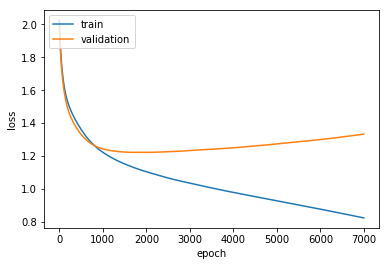

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

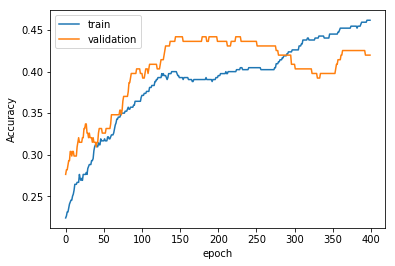

In [61]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()